## Bank Credit Scoring Model
**<div style="color:purple"> <u>Name of Researcher: Akintunde Akinsulure</u></div>**

### <center><u>Project Overview & Instructions:</u></center>

<u>**Overview**</u>
The goal of this project is to build a model that borrowers can use to help make the best financial decisions. Historical data are provided on 250,000 borrowers.

<u>**Description**</u>
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the methods banks use to determine whether or not a loan should be granted. This project requires you to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

=============================================================

<u>**Evaluation Metric**</u>

- Evaluate the performance of your model using
    - AUC score
    - Accuracy score
    - F1-Score

Remember: The closer your AUC Score, F1-Score, and Accuracy Score is to 1, the better your model performance.





### Instructions

You've been provided with the train & test dataset so you’re expected to

- Perform Data Cleaning (if need be)
- Perform Exploratory Data Analysis
- Data Visualization
- You must show at least 5 meaningful visualizations (emphasis on meaningful)
- Ensure to include a detailed inference in each visualization
- You must use at least 3 different plots in your visualization (scatter plot, line plot, bar plot,     histogram, count plot, box plot, pie plot, donut plot, sunburst plot, etc)
- Plot The Correlation Matrix
- Mention the 3 features that correlate the most with your response variable
- Split your data into train and test sets.
- use 80/20 when splitting your dataset. (your test set should be 20% of the whole train data)
- Perform Data Preprocessing
- Handling duplicates
- Handling missing values
- Scaling numeric features
- Encoding categorical features

================================================

- Perform Model Training
- Build 4 ML model using Logistic Regression and three other algorithms:

- Build a baseline model using Logistic Regression
- Pick three other algorithms from these: LightGBM or Decision Tree or Random Forest or XGBoost (we’ve   not used LightGBM and Decision Tree in class, however, the goal is for you to do your own research     and figure out how to use whichever algorithm you picked)

Then train your model on the train set, and evaluate your model performance on the test set. 

================================================

For each of the models you trained with the 4 algorithms you picked:

- Plot The Feature Importance Of The Models
- Show The Models AUC score, F1-Score, & Accuracy score
- Which Algorithm performed better and why do you think so?

================================================

What Can You Infer From Your Model Performance?
- Given your answer in #10, briefly comment on what you can infer as regards your model’s ability to generalize on unseen data. Is your model overfitting or underfitting or able to generalize well on unseen data?
- Justify your answer.

Comment on any interesting thing you might wanna try if you were to keep improving/add more stuff to what you’ve done so far



In [1]:
#importing neccesary libraries
import warnings


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from pandas_summary import DataFrameSummary
import plotly as px

plt.style.use('seaborn-v0_8-bright')
sns.set(rc={"figure.figsize": (15, 8)})
plt.rcParams['figure.autolayout'] = True

%matplotlib inline
warnings.filterwarnings("ignore")

### <div style="text-align:center">Loading the data into pandas</div>

In [2]:
train_data = pd.read_csv('datasets/cs-training.csv')
test_data = pd.read_csv('datasets/cs-test.csv')
dict_data = pd.read_excel('datasets/Data Dictionary.xls')

In [3]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
dict_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


The explanations of all the column titles are in `dict data` above

## <div style="text-align:center">Explaratory Data Analysis and Data Visualization</div>

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

Since both our train and test data need cleaning, it would be wise to combine them for cleaning, then split after

In [8]:
### Adding an Indicator column, to help in splitting later
train_data['ind'] = 0
test_data['ind'] = 1

In [9]:
combined_df = pd.concat([train_data, test_data], axis=0)
## Duplicating the DataFrame, so it is not accidentally ultered during cleaning
combined_df = combined_df.copy()

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 0 to 101502
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            251503 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 3   age                                   251503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 5   DebtRatio                             251503 non-null  float64
 6   MonthlyIncome                         201669 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 8   NumberOfTimes90DaysLate               251503 non-null  int64  
 9   NumberRealEstateLoansOrLines          251503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 11  

Great!!! 
<p>Proceeding Further</p>

In [10]:
## Descriptive stats of numerical columns
df2 = combined_df
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,251503.0,65214.153533,40078.948539,1.0,31438.500000,62876.000000,94314.000000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,251503.0,5.750415,229.633980,0.0,0.029977,0.153575,0.561293,50708.0
age,251503.0,52.339694,14.775120,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,251503.0,0.434245,4.335643,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,251503.0,349.562468,1884.792016,0.0,0.174330,0.365612,0.861754,329664.0
MonthlyIncome,201669.0,6744.818167,25717.610237,0.0,3400.000000,5400.000000,8212.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,251503.0,8.453064,5.145194,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,251503.0,0.278370,4.312539,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,251503.0,1.016155,1.121935,0.0,0.000000,1.000000,2.000000,54.0


We have only numerical features, so the descriptive stats of categorical features won't work

**DateFrame Overview**

In [11]:
def get_overview(df):
    var_df = pd.DataFrame(columns=[
        'Variable', 'NaN', 'Percentage Missing', 'Unique', 'N-Unique', 'Dtype'
    ])
    for i, col in enumerate(df.columns):
        missing = f"{round((df[col].isna().sum() / len(df[col]))*100, 2)}%"
        var_df.loc[i] = [
            col, df[col].isna().sum(), missing, df[col].unique(),
            df[col].nunique(), df[col].dtypes
        ]
    var_df.reset_index(inplace=True)
    return var_df


get_overview(combined_df)

,index,Variable,NaN,Percentage Missing,Unique,N-Unique,Dtype
0,0,Unnamed: 0,0,0.0%,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",150000,int64
1,1,SeriousDlqin2yrs,101503,40.36%,"[1.0, 0.0, nan]",2,float64
2,2,RevolvingUtilizationOfUnsecuredLines,0,0.0%,"[0.766126609, 0.957151019, 0.65818014, 0.23380...",208075,float64
3,3,age,0,0.0%,"[45, 40, 38, 30, 49, 74, 57, 39, 27, 51, 46, 7...",88,int64
4,4,NumberOfTime30-59DaysPastDueNotWorse,0,0.0%,"[2, 0, 1, 3, 4, 5, 7, 10, 6, 98, 12, 8, 9, 96,...",17,int64
5,5,DebtRatio,0,0.0%,"[0.802982129, 0.121876201, 0.085113375, 0.0360...",182595,float64
6,6,MonthlyIncome,49834,19.81%,"[9120.0, 2600.0, 3042.0, 3300.0, 63588.0, 3500...",15757,float64
7,7,NumberOfOpenCreditLinesAndLoans,0,0.0%,"[13, 4, 2, 5, 7, 3, 8, 9, 6, 10, 14, 22, 17, 1...",60,int64
8,8,NumberOfTimes90DaysLate,0,0.0%,"[0, 1, 3, 2, 5, 4, 98, 10, 9, 6, 7, 8, 15, 96,...",21,int64
9,9,NumberRealEstateLoansOrLines,0,0.0%,"[6, 0, 1, 3, 4, 2, 5, 8, 7, 9, 17, 15, 10, 12,...",29,int64


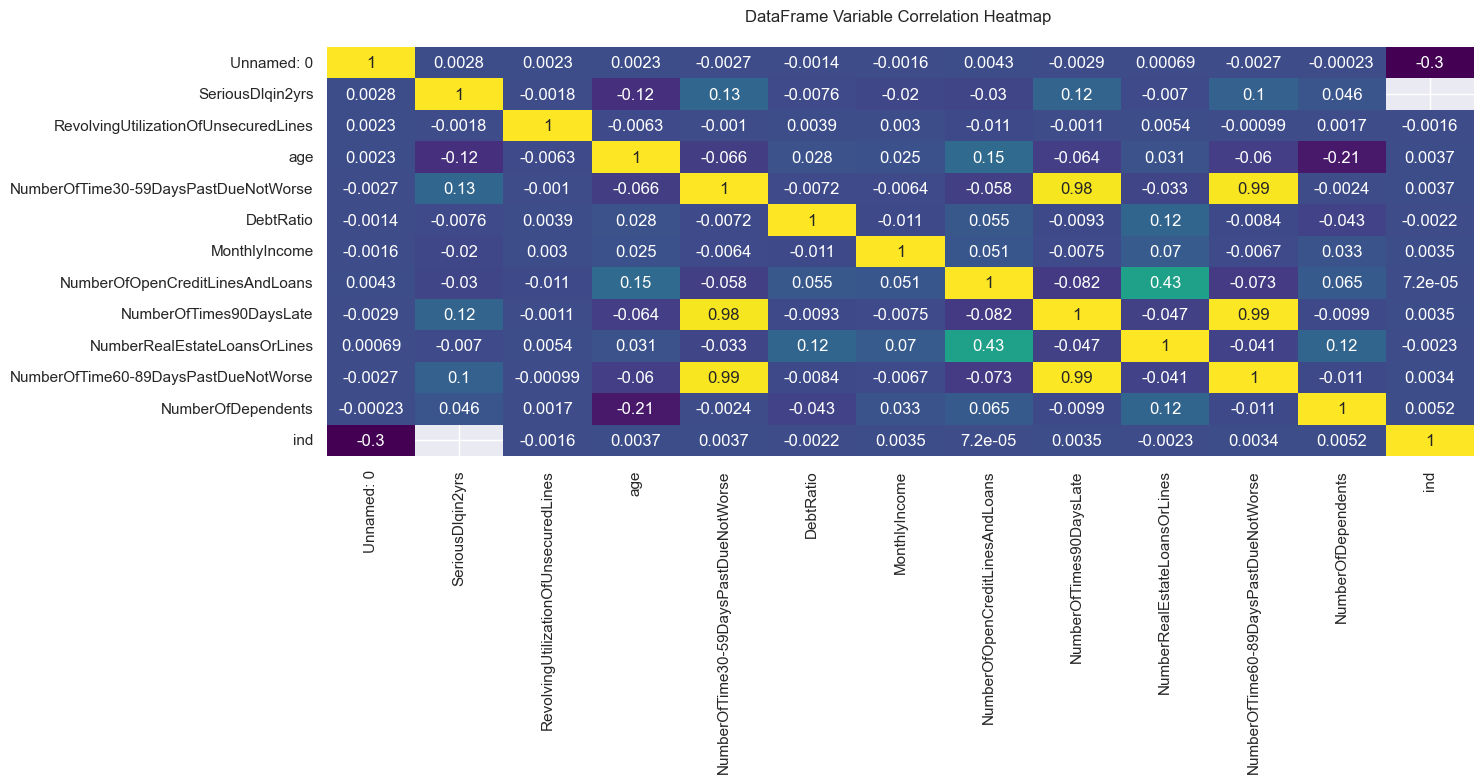

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap="viridis", cbar=False)
plt.title("DataFrame Variable Correlation Heatmap \n");

#### <div style="text-align:center">Dropping Irrelevant columns</div> 

From the `overview_df` above, it's obvious the `Unnamed:0` column holds no valuable information as it's just like the index so we have to liberty of dropping

In [13]:
combined_df.drop(columns=["Unnamed: 0"], inplace=True)

#### <div style="text-align:center">Handling Columns with Missing Values</div> 

Missing values for the Train Data

In [14]:
for x in combined_df.drop(columns="SeriousDlqin2yrs").columns:
    print(
        f"The percentage of missing values in train_data {x} column is: {round(((combined_df[combined_df['ind'] == 0][x].isna().sum())/(len(combined_df[combined_df['ind'] == 0][x])))* 100, 2)}%"
    )

The percentage of missing values in train_data RevolvingUtilizationOfUnsecuredLines column is: 0.0%
The percentage of missing values in train_data age column is: 0.0%
The percentage of missing values in train_data NumberOfTime30-59DaysPastDueNotWorse column is: 0.0%
The percentage of missing values in train_data DebtRatio column is: 0.0%
The percentage of missing values in train_data MonthlyIncome column is: 19.82%
The percentage of missing values in train_data NumberOfOpenCreditLinesAndLoans column is: 0.0%
The percentage of missing values in train_data NumberOfTimes90DaysLate column is: 0.0%
The percentage of missing values in train_data NumberRealEstateLoansOrLines column is: 0.0%
The percentage of missing values in train_data NumberOfTime60-89DaysPastDueNotWorse column is: 0.0%
The percentage of missing values in train_data NumberOfDependents column is: 2.62%
The percentage of missing values in train_data ind column is: 0.0%


Missing values for the Test data

In [15]:
for x in combined_df.drop(columns="SeriousDlqin2yrs").columns:
    print(
        f"The percentage of missing values in test_data {x} column is: {round(((combined_df[combined_df['ind'] == 1][x].isna().sum())/(len(combined_df[combined_df['ind'] == 1][x])))* 100, 2)}%"
    )

The percentage of missing values in test_data RevolvingUtilizationOfUnsecuredLines column is: 0.0%
The percentage of missing values in test_data age column is: 0.0%
The percentage of missing values in test_data NumberOfTime30-59DaysPastDueNotWorse column is: 0.0%
The percentage of missing values in test_data DebtRatio column is: 0.0%
The percentage of missing values in test_data MonthlyIncome column is: 19.81%
The percentage of missing values in test_data NumberOfOpenCreditLinesAndLoans column is: 0.0%
The percentage of missing values in test_data NumberOfTimes90DaysLate column is: 0.0%
The percentage of missing values in test_data NumberRealEstateLoansOrLines column is: 0.0%
The percentage of missing values in test_data NumberOfTime60-89DaysPastDueNotWorse column is: 0.0%
The percentage of missing values in test_data NumberOfDependents column is: 2.59%
The percentage of missing values in test_data ind column is: 0.0%


In [16]:
# Checking for rows with more than 3 missing values
combined_df[combined_df.isnull().sum(axis=1) > 3]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ind


- **`Monthly Income`**

The `Monthly Income` column has as many as `19.81%` values missing, so dropping this would lead to significant loss of data.
<p>A solution is to fill with the mean of the column</p>

In [17]:
combined_df['MonthlyIncome'].fillna(combined_df['MonthlyIncome'].mean(),
                                    inplace=True)

In [18]:
print("Successfully filled!!!") if combined_df['MonthlyIncome'].isna().sum(
) == 0 else print("There are still missing Values in the Column")

Successfully filled!!!


- **`Number Of Dependants`**

The `Number Of Dependants` column has approx `2.6%` values missing,we can decide to fill by the mode of the corresponding `NumberRealEstateLoansOrLines` since that is the most correlated column, from the correlation heat map done above

In [19]:
depend_dict = combined_df.groupby('NumberRealEstateLoansOrLines')[
    'NumberOfDependents'].apply(lambda x: x.mode().iloc[0]).to_dict()
combined_df['NumberOfDependents'].fillna(
    combined_df['NumberRealEstateLoansOrLines'].map(depend_dict), inplace=True)

In [20]:
print("Successfully filled!!!") if combined_df['NumberOfDependents'].isna(
).sum() == 0 else print("There are still missing Values in the Column")

Successfully filled!!!


Now that missing values have been handled, let's move on to handling Outliers

#### <div style="text-align:center">Finding and Handling Outliers In some numerical Features</div> 

In [21]:
### <--- Selecting numerical features and categorical features:
numerical_cols = []
categorial_cols = []

for x in combined_df.drop(columns=["SeriousDlqin2yrs", "ind"]):
    if combined_df[x].nunique() >= 70:
        numerical_cols.append(x)
    else:
        categorial_cols.append(x)

numerical_cols

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']

Some columns have justified outliers which means they aren't as a result of error, just results of rare cases.


- **Examples are :**
    -    `RevolvingUtilizationOfUnsecuredLines` which is a percentage value (conains only values ranging between 0 nd 1 )
    -    `Age` as there is no restriction to how old a person cal live
    -    `Debt Ratio` Which is also between 0 and 1
    -    `Monthly Income` no limit to how much a person can earn monthly
    
Now, turns out there is justification for any outliers present
<p>We proceed treating the columns one by one</p>
    

### <div style="text-align:center">`RevolvingUtilizationOfUnsecuredLines` (Feature) Variable</div>

In [22]:
# Function to make describing faster
def describe(col):
    sep = "======"
    print("Value Counts:")
    print(col.value_counts())
    print(f"\n {sep*10} \n ")
    print("Dtype:")
    print(col.dtypes)
    print(f" \n {sep*10} \n ")
    print("Unique:")
    print(col.unique())
    print(f" \n {sep*10} \n ")
    print("NUnique:")
    print(col.nunique())

In [23]:
describe(combined_df['RevolvingUtilizationOfUnsecuredLines'])

Value Counts:
0.000000    18189
1.000000    17283
1.000000       29
0.713147       12
0.966068       10
            ...  
0.703409        1
0.124284        1
0.877650        1
0.682797        1
0.441842        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 208075, dtype: int64

 
Dtype:
float64
 
 
Unique:
[0.76612661 0.95715102 0.65818014 ... 0.08159637 0.33545655 0.44184166]
 
 
NUnique:
208075


Since This column is a percentage column, we are only to have values between 0 and 1 inside of it, let's now check if there are any violations

In [24]:
len(combined_df[(combined_df['RevolvingUtilizationOfUnsecuredLines'] > 1) |
            (combined_df['RevolvingUtilizationOfUnsecuredLines'] < 0)])

5502

In [25]:
combined_df[(combined_df['RevolvingUtilizationOfUnsecuredLines'] > 1) |
            (combined_df['RevolvingUtilizationOfUnsecuredLines'] < 0)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ind
162,1.0,1.046279,47,1,1.104301,5416.000000,6,0,2,0,1.0,0
191,0.0,1.095083,53,5,0.536704,3500.000000,7,1,1,2,0.0,0
226,1.0,1.953488,38,0,0.153500,3556.000000,5,0,0,0,2.0,0
251,1.0,1.048211,58,7,0.151957,3500.000000,12,0,0,0,0.0,0
293,0.0,2340.000000,45,0,0.339333,8333.000000,7,0,2,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101283,NaN,1.117520,51,5,0.807154,4500.000000,9,2,2,1,1.0,1
101296,NaN,1.060597,30,0,730.000000,6744.818167,5,0,0,0,0.0,1
101407,NaN,1.122924,46,0,74.000000,6744.818167,2,0,0,1,0.0,1
101474,NaN,1.032484,47,0,0.365243,2036.000000,2,0,0,1,0.0,1


Turns there are columns with these violations, so a solution is to replace those with more than `100%` with `1`, and those less than `0%` with `0`

In [26]:
## Replacing those greater than 1
combined_df['RevolvingUtilizationOfUnsecuredLines'][
    combined_df['RevolvingUtilizationOfUnsecuredLines'] > 1] = 1.0

## Replacing those less than 0
combined_df['RevolvingUtilizationOfUnsecuredLines'][
    combined_df['RevolvingUtilizationOfUnsecuredLines'] < 0] = 0.0



Checking again

In [27]:
combined_df[(combined_df['RevolvingUtilizationOfUnsecuredLines'] > 1) |
            (combined_df['RevolvingUtilizationOfUnsecuredLines'] < 0)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ind


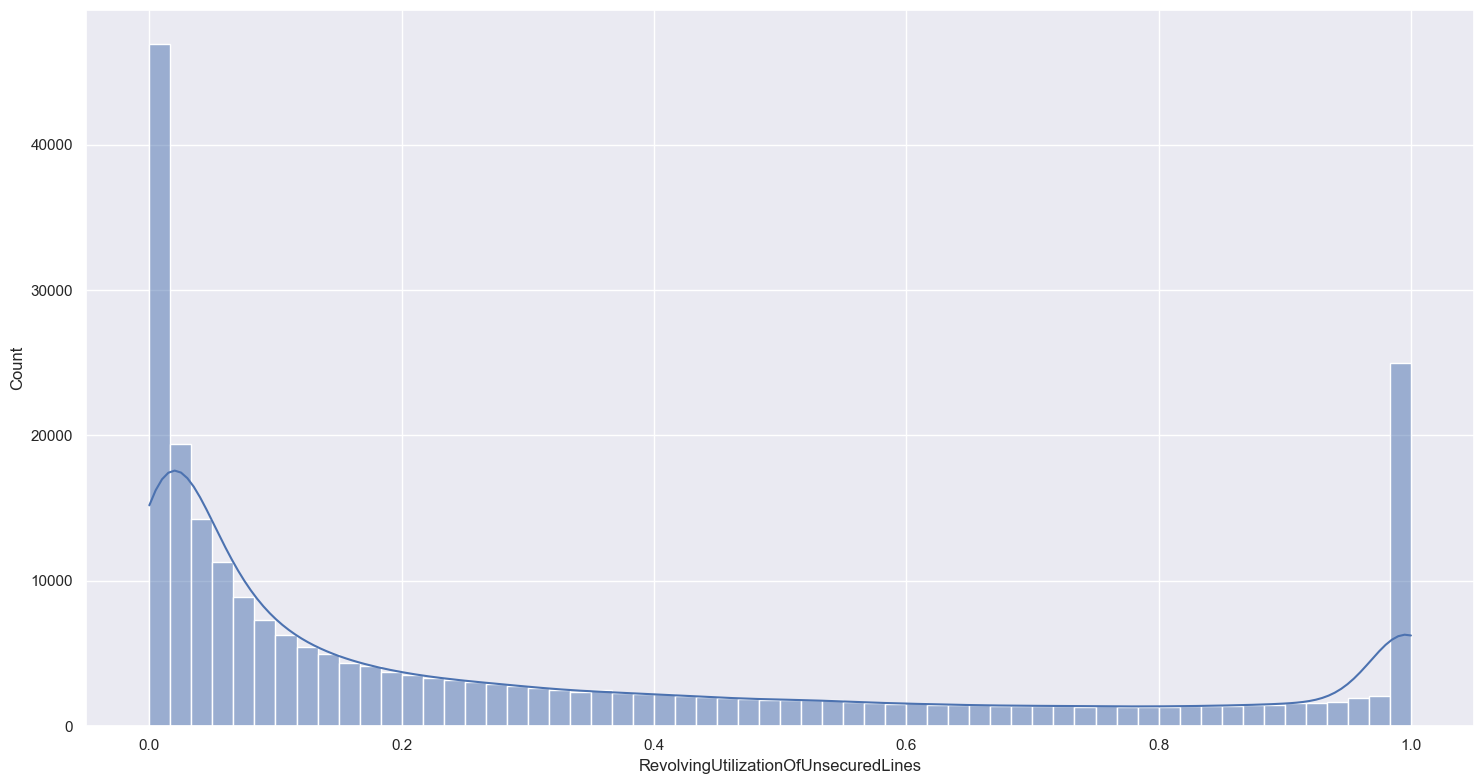

In [28]:
sns.histplot(data=combined_df,
             x='RevolvingUtilizationOfUnsecuredLines',
             kde=True);

- Plot Inference
    - Most People don't use thier credit ards for a long while

to the next column

### <div style="text-align:center">`Age` Column</div>

In [29]:
describe(combined_df['age'])

Value Counts:
49     6388
48     6370
50     6357
47     6250
63     6246
       ... 
107       1
105       1
0         1
104       1
100       1
Name: age, Length: 88, dtype: int64

 
Dtype:
int64
 
 
Unique:
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109 104 100]
 
 
NUnique:
88



---

**Checking for rows with age less than 18, and removing them because someone no child is eligible to be granted a loan**

In [30]:
print(f"The number of rows with too small ages is: {len(combined_df['age'][(combined_df['age'] <= 18) & (combined_df['ind'] == 0)])}")

combined_df[combined_df['ind'] == 0] = combined_df[(combined_df['ind'] == 0)&(combined_df['age'] >= 18)]
combined_df.reset_index(inplace=True)

The number of rows with too small ages is: 1


In [31]:
## Checking if there were still any of such cases left in the train_data
if (combined_df['age'] < 18).any():
    print('not done yet')
else:
    print("Operation Successful!!!")

Operation Successful!!!


### Distribution of Ages

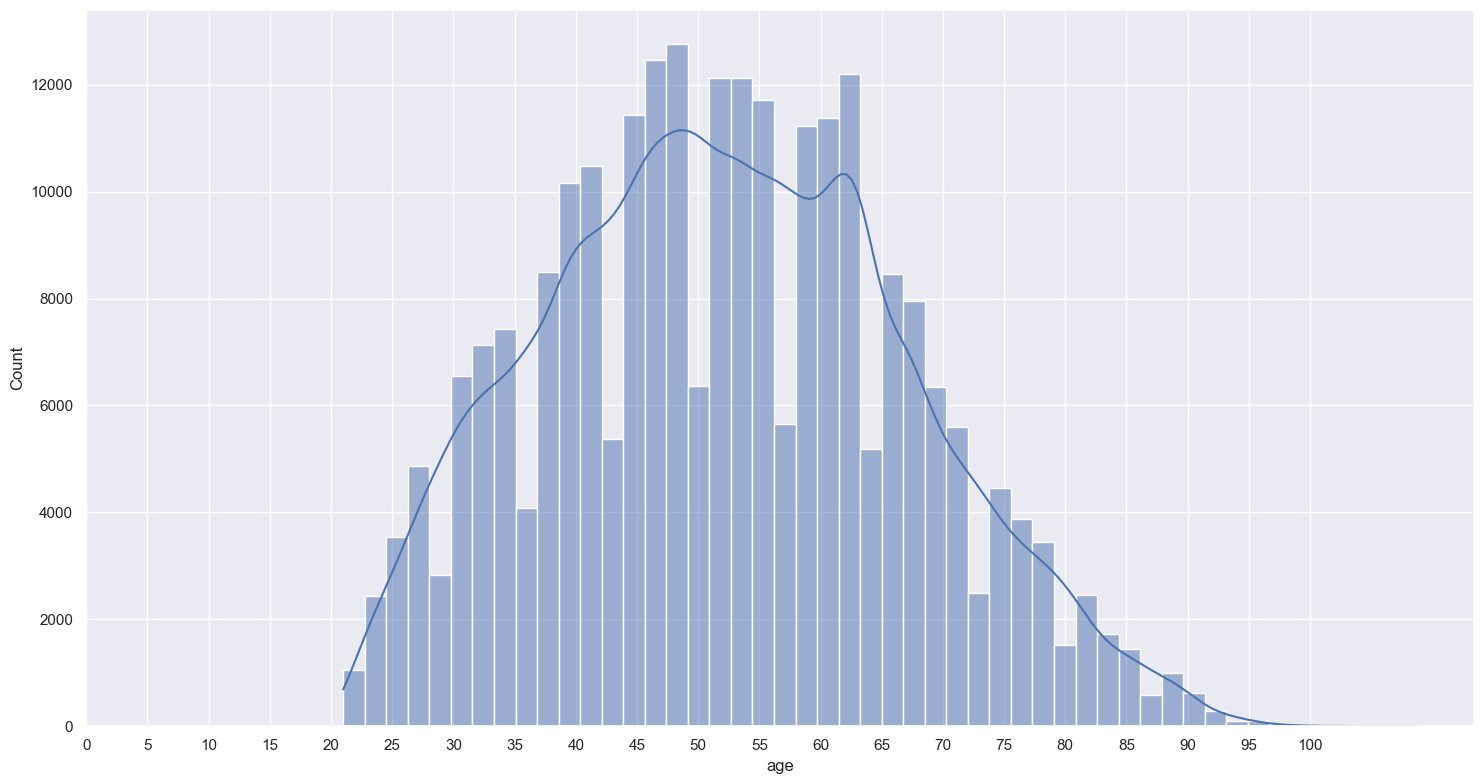

In [32]:
sns.histplot(data=combined_df, x='age', bins=50, kde=True)
plt.xticks(range(0,101,5));

### <div style="text-align:center">`Debt Ratio` Column</div>

In [33]:
describe(combined_df['DebtRatio'])

Value Counts:
0.000000    6888
1.000000     377
2.000000     287
3.000000     283
4.000000     272
            ... 
0.004418       1
0.015241       1
1.020408       1
0.257873       1
0.198918       1
Name: DebtRatio, Length: 182594, dtype: int64

 
Dtype:
float64
 
 
Unique:
[0.80298213 0.1218762  0.08511338 ... 0.06852248 0.93421744 0.19891837]
 
 
NUnique:
182594


In [34]:
len(combined_df[(combined_df['age'] > 1) |
            (combined_df['age'] < 0)])

251502

There are values greater than one i.e greater than 100% , which are wierd but we leave then like that because they hold a large percentage of the entire dataset..

Probably these are people with larger debt than thier income

---

### DebtRatio Boxplot

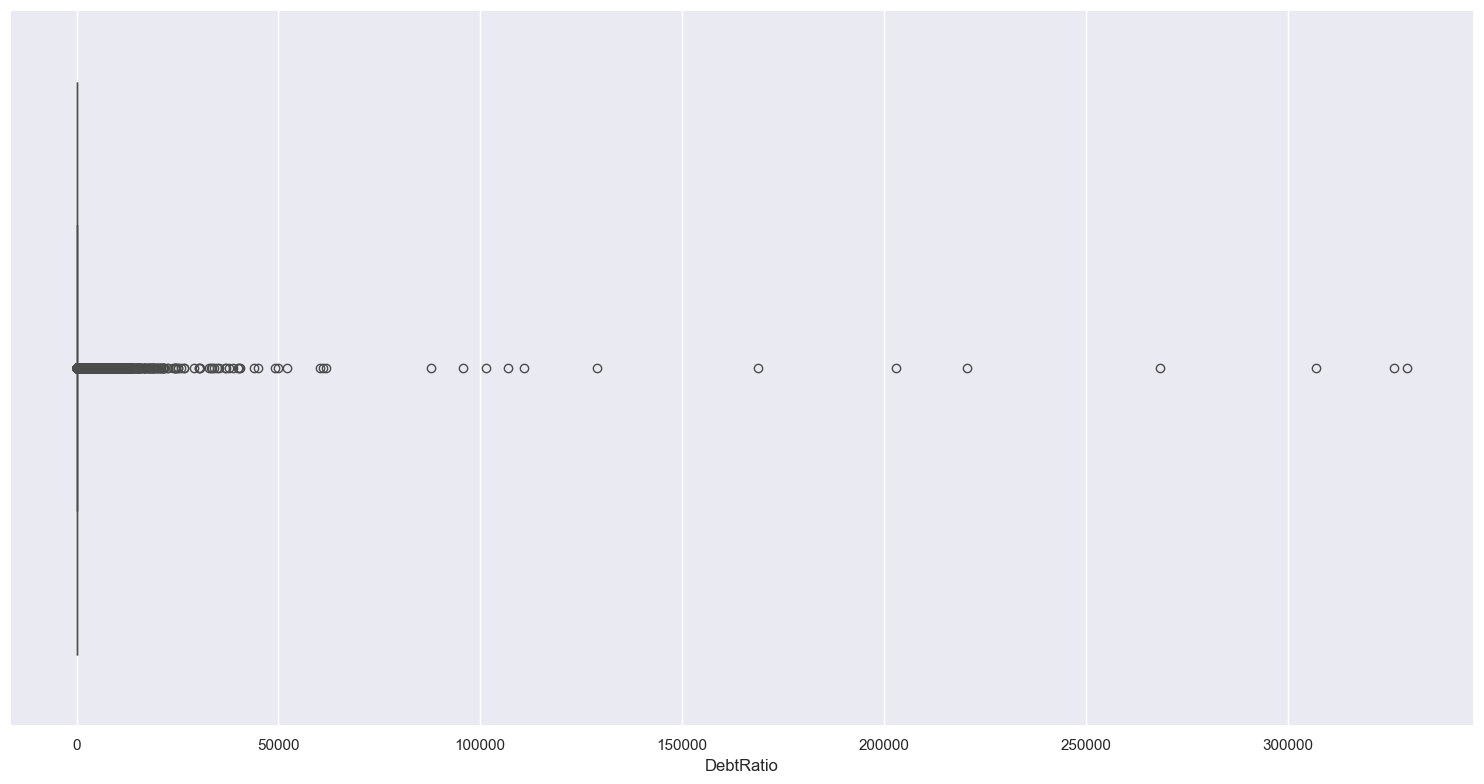

In [35]:
sns.boxplot(combined_df,x='DebtRatio');

There are obviously extreme outliers in this dataset we can't ignore, so withot much adu or how do they say it🤣.. let's proceed

In [36]:
combined_df.shape

(251503, 13)

#### Age to Debt Ratio BarPlot


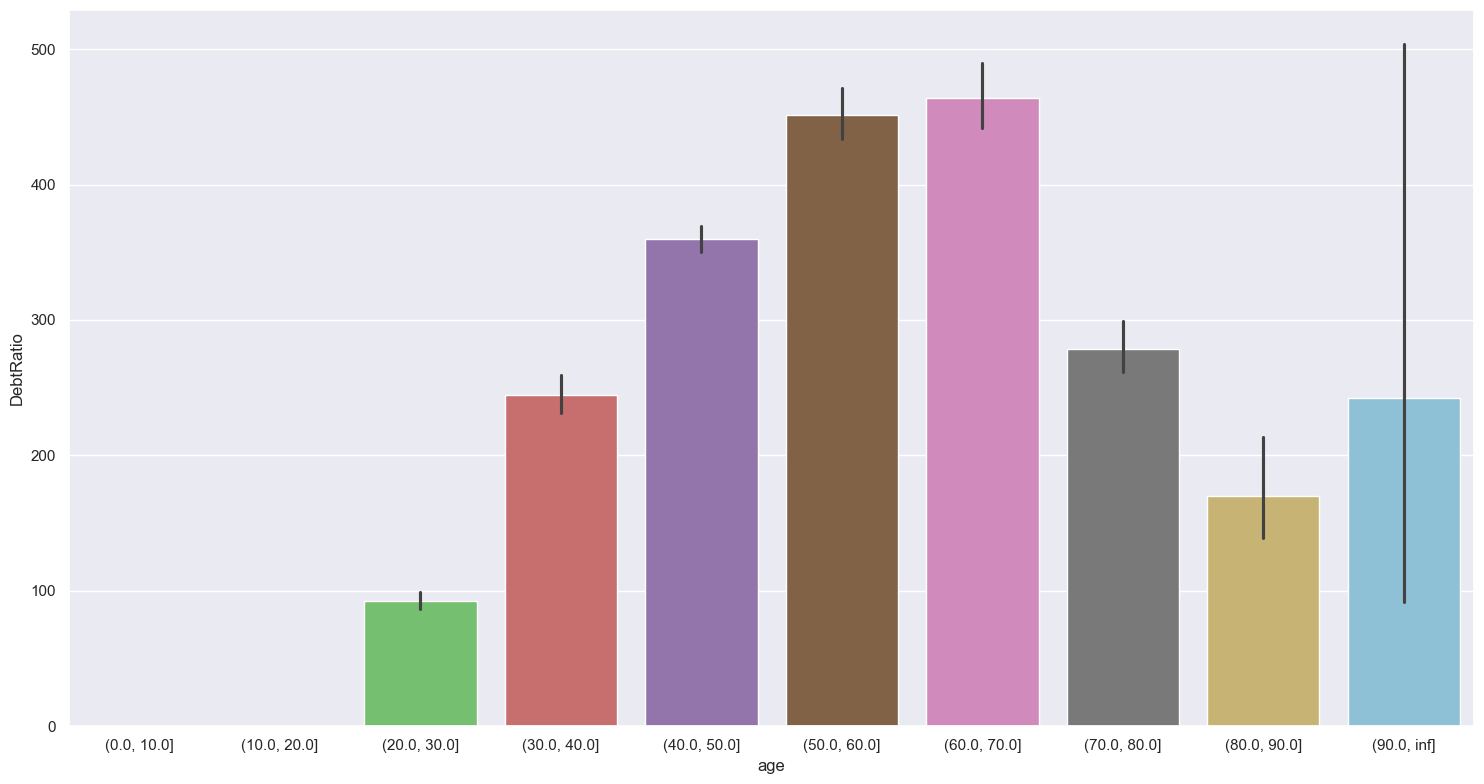

In [37]:
sns.barplot(pd.DataFrame({'age': pd.cut(combined_df['age'], bins=[0,10,20,30,40,50,60,70,80,90,np.inf]),'DebtRatio':combined_df['DebtRatio']}), x='age', y='DebtRatio', palette='muted');

People around 60 to 70 years old are more likely to owe a lot

---

### `NumberOfTime30-59DaysPastDueNotWorse` (Feature) Variable

In [38]:
describe(combined_df['NumberOfTime30-59DaysPastDueNotWorse'])

Value Counts:
0.0     211208
1.0      26869
2.0       7766
3.0       2955
4.0       1257
5.0        547
98.0       477
6.0        228
7.0         96
8.0         53
9.0         22
10.0        11
96.0         6
12.0         3
11.0         2
13.0         1
19.0         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

 
Dtype:
float64
 
 
Unique:
[ 2.  0.  1.  3.  4.  5.  7. 10.  6. 98. 12.  8.  9. 96. nan 13. 11. 19.]
 
 
NUnique:
17


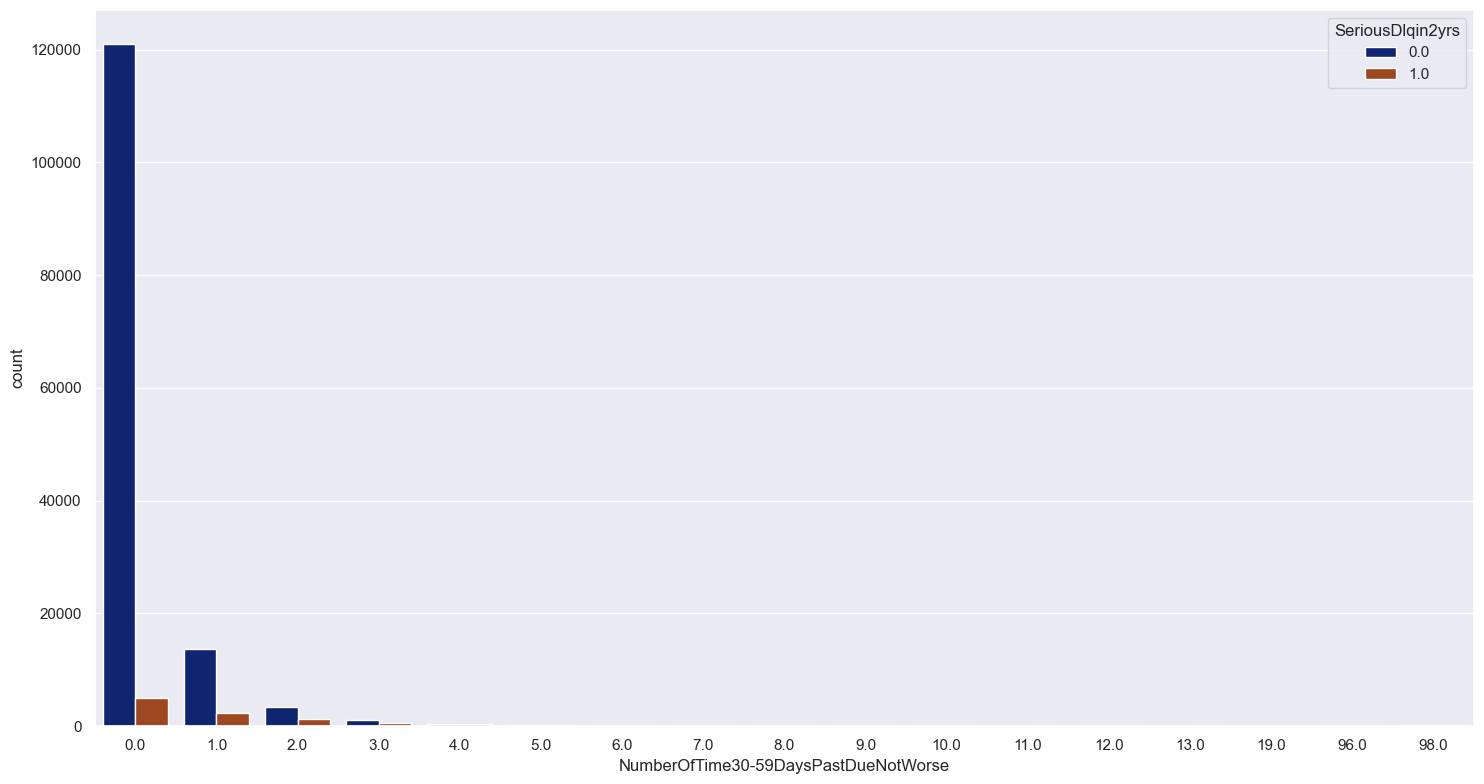

In [39]:
sns.countplot(data=combined_df, x='NumberOfTime30-59DaysPastDueNotWorse', hue='SeriousDlqin2yrs', palette='dark');

- Plot Inference
    - Most people pay up withing the time given, just very few enter thier due days

### `NumberOfTime60-89DaysPastDueNotWorse` (Feature) Variable

In [40]:
describe(combined_df['NumberOfTime60-89DaysPastDueNotWorse'])

Value Counts:
0.0     238770
1.0       9594
2.0       1849
3.0        534
98.0       477
4.0        166
5.0         59
6.0         23
7.0         16
96.0         6
9.0          4
8.0          3
11.0         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

 
Dtype:
float64
 
 
Unique:
[ 0.  1.  2.  5.  3. 98.  4.  6.  7.  8. 96. 11. nan  9.]
 
 
NUnique:
13


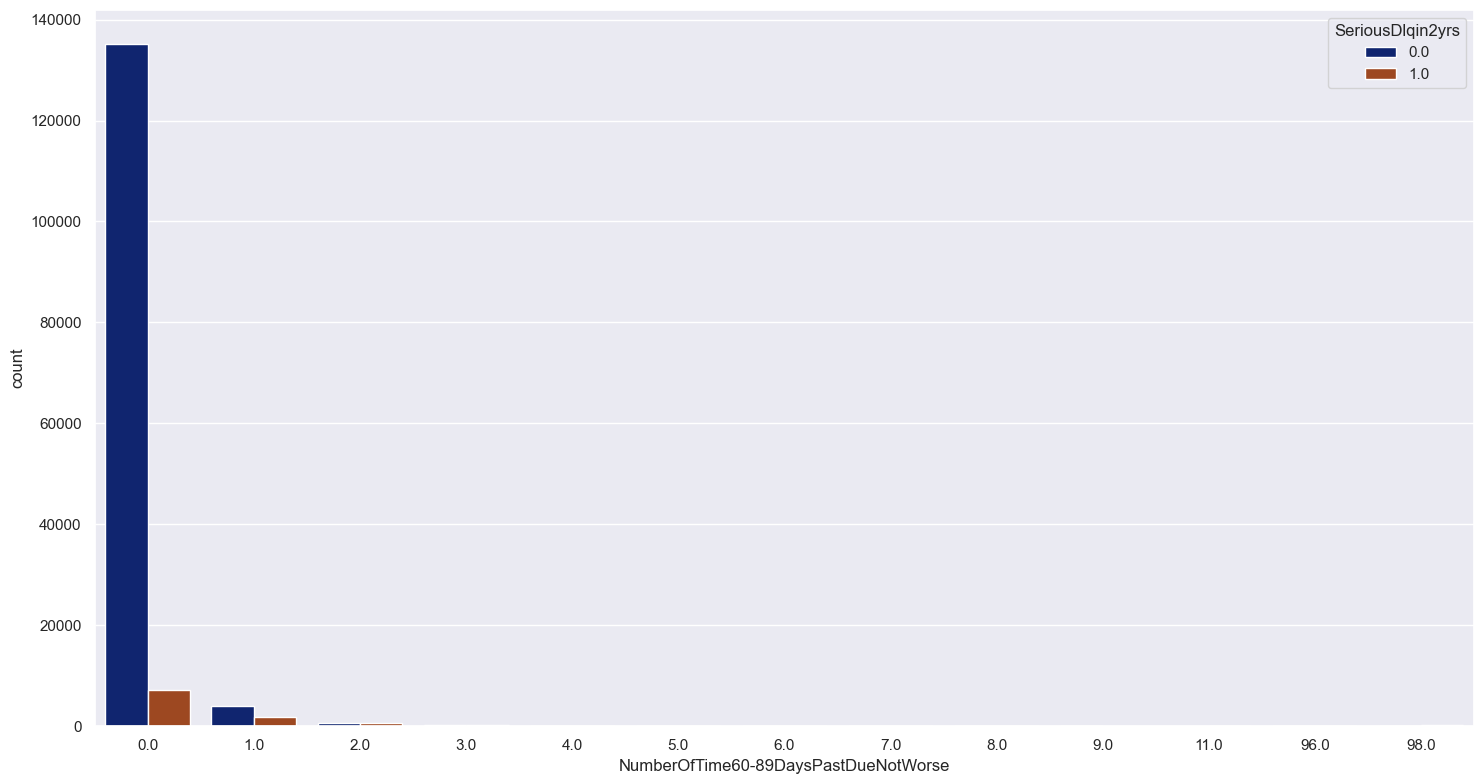

In [41]:
sns.countplot(data=combined_df, x='NumberOfTime60-89DaysPastDueNotWorse', hue='SeriousDlqin2yrs', palette='dark');

- Plot Inference
    - Most people pay up withing the time given, just very few enter thier due days

- Plot Inference
    - Most people pay up withing the time given, just very few enter thier due days

### `NumberOfTimes90DaysLate` (Feature) Variable

In [42]:
describe(combined_df['NumberOfTimes90DaysLate'])

Value Counts:
0.0     237446
1.0       8837
2.0       2617
3.0       1112
4.0        482
98.0       477
5.0        233
6.0        124
7.0         64
8.0         40
9.0         33
10.0        10
96.0         6
11.0         6
13.0         4
12.0         3
15.0         2
14.0         2
17.0         2
16.0         1
18.0         1
Name: NumberOfTimes90DaysLate, dtype: int64

 
Dtype:
float64
 
 
Unique:
[ 0.  1.  3.  2.  5.  4. 98. 10.  9.  6.  7.  8. 15. 96. nan 11. 13. 14.
 17. 12. 16. 18.]
 
 
NUnique:
21


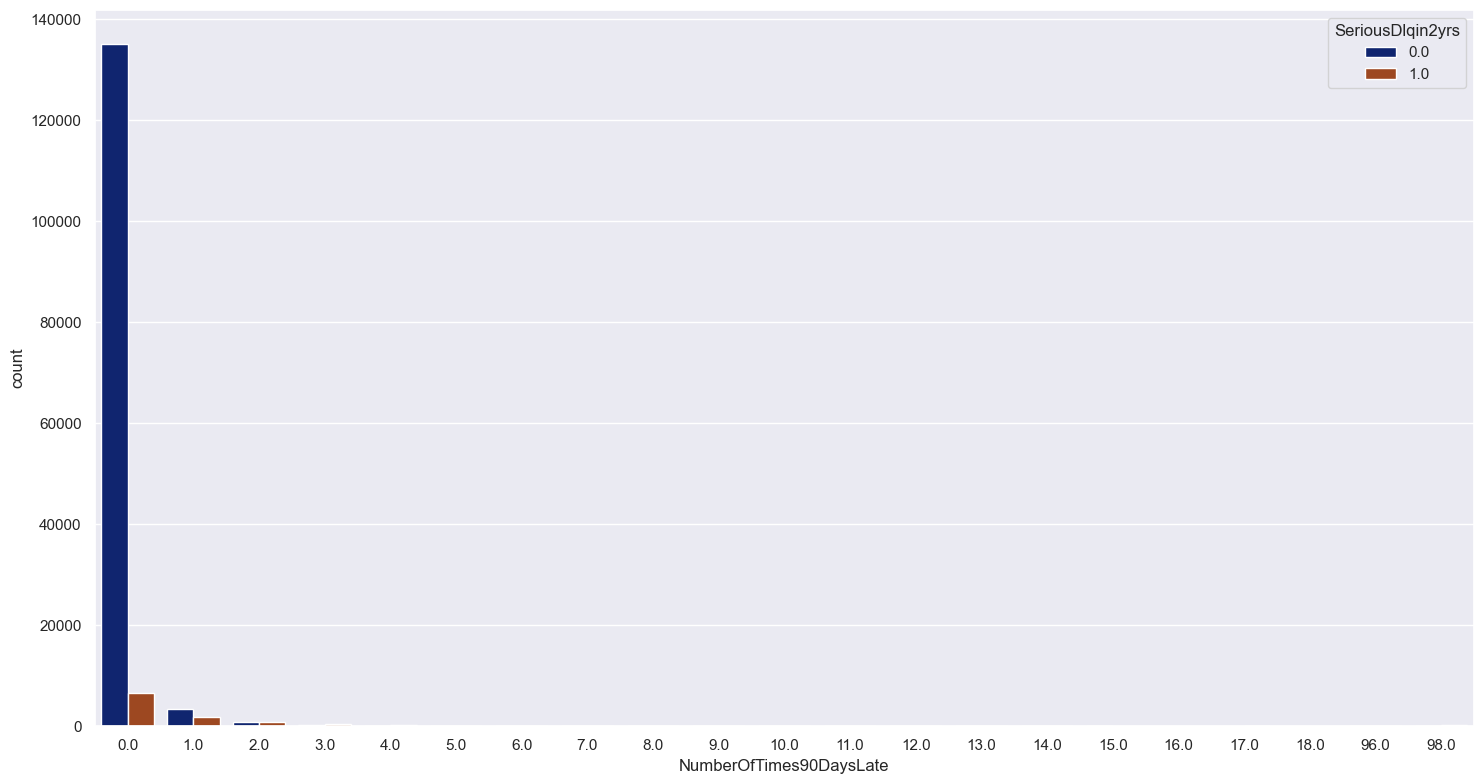

In [43]:
sns.countplot(data=combined_df, x='NumberOfTimes90DaysLate', hue='SeriousDlqin2yrs', palette='dark');

- Plot Inference
    - Most people pay up withing the time given, just very few enter thier due days

---


Practically, the three columns above carry very very similar information, so it might be best to represent all this information in a sngle column.. Let's see what can be done below

In [44]:
###  After considerable thought, it might be best to get the closest estimate of the number of days which they defaulted, 
### by multiplying the frequency by the average of the date range of the corresponding frequency
combined_df['total_number_of_daysLate'] = combined_df.apply(
    lambda row: ((row['NumberOfTime30-59DaysPastDueNotWorse'] * np.average(
        [i for i in range(30, 60)])) +
    (row['NumberOfTime60-89DaysPastDueNotWorse'] * np.average(
        [i for i in range(60, 90)]))+
    (row['NumberOfTimes90DaysLate']*90))
, axis=1)

# Now dropping the columns, cuz we no longer need them
combined_df.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], inplace=True)

In [45]:
combined_df.drop(columns=['index'], inplace=True)
combined_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ind,total_number_of_daysLate
0,1.0,0.766127,45.0,0.802982,9120.000000,13.0,6.0,2.0,0.0,89.0
1,0.0,0.957151,40.0,0.121876,2600.000000,4.0,0.0,1.0,0.0,0.0
2,0.0,0.658180,38.0,0.085113,3042.000000,2.0,0.0,0.0,0.0,134.5
3,0.0,0.233810,30.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,0.024926,63588.000000,7.0,1.0,0.0,0.0,44.5
...,...,...,...,...,...,...,...,...,...,...
251498,NaN,0.282653,24.0,0.068522,1400.000000,5.0,0.0,0.0,1.0,0.0
251499,NaN,0.922156,36.0,0.934217,7615.000000,8.0,2.0,4.0,1.0,133.5
251500,NaN,0.081596,70.0,836.000000,6744.818167,3.0,0.0,0.0,1.0,0.0
251501,NaN,0.335457,56.0,3568.000000,6744.818167,8.0,2.0,3.0,1.0,74.5


In [46]:
combined_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'ind',
       'total_number_of_daysLate'],
      dtype='object')

### <div style='text-align:center'>`NumberOfOpenCreditLinesAndLoans` Column</div>

In [47]:
dict_data.iloc[7][1]

'Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)'

**This columns represents  the customer's number of open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)at that time**

In [48]:
### Loking into the distribution of the values
combined_df['NumberOfOpenCreditLinesAndLoans'].value_counts()

6.0     22830
7.0     22353
5.0     21658
8.0     21031
4.0     19388
9.0     18892
10.0    16345
3.0     15226
11.0    13988
12.0    11713
2.0     11123
13.0     9451
14.0     7625
1.0      7485
15.0     6135
16.0     4984
17.0     3938
18.0     3155
0.0      3138
19.0     2439
20.0     1926
21.0     1454
22.0     1121
23.0      905
24.0      702
25.0      556
26.0      430
27.0      312
28.0      249
29.0      184
30.0      142
31.0      132
32.0       99
33.0       92
34.0       58
35.0       44
36.0       32
38.0       26
40.0       17
37.0       15
45.0       14
39.0       13
42.0       12
43.0       11
44.0        8
41.0        8
48.0        7
49.0        5
52.0        4
54.0        4
47.0        4
46.0        4
51.0        3
58.0        2
57.0        2
56.0        2
50.0        2
53.0        2
63.0        1
85.0        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

#### Checking the relationship between number of open loans the customer has and other features

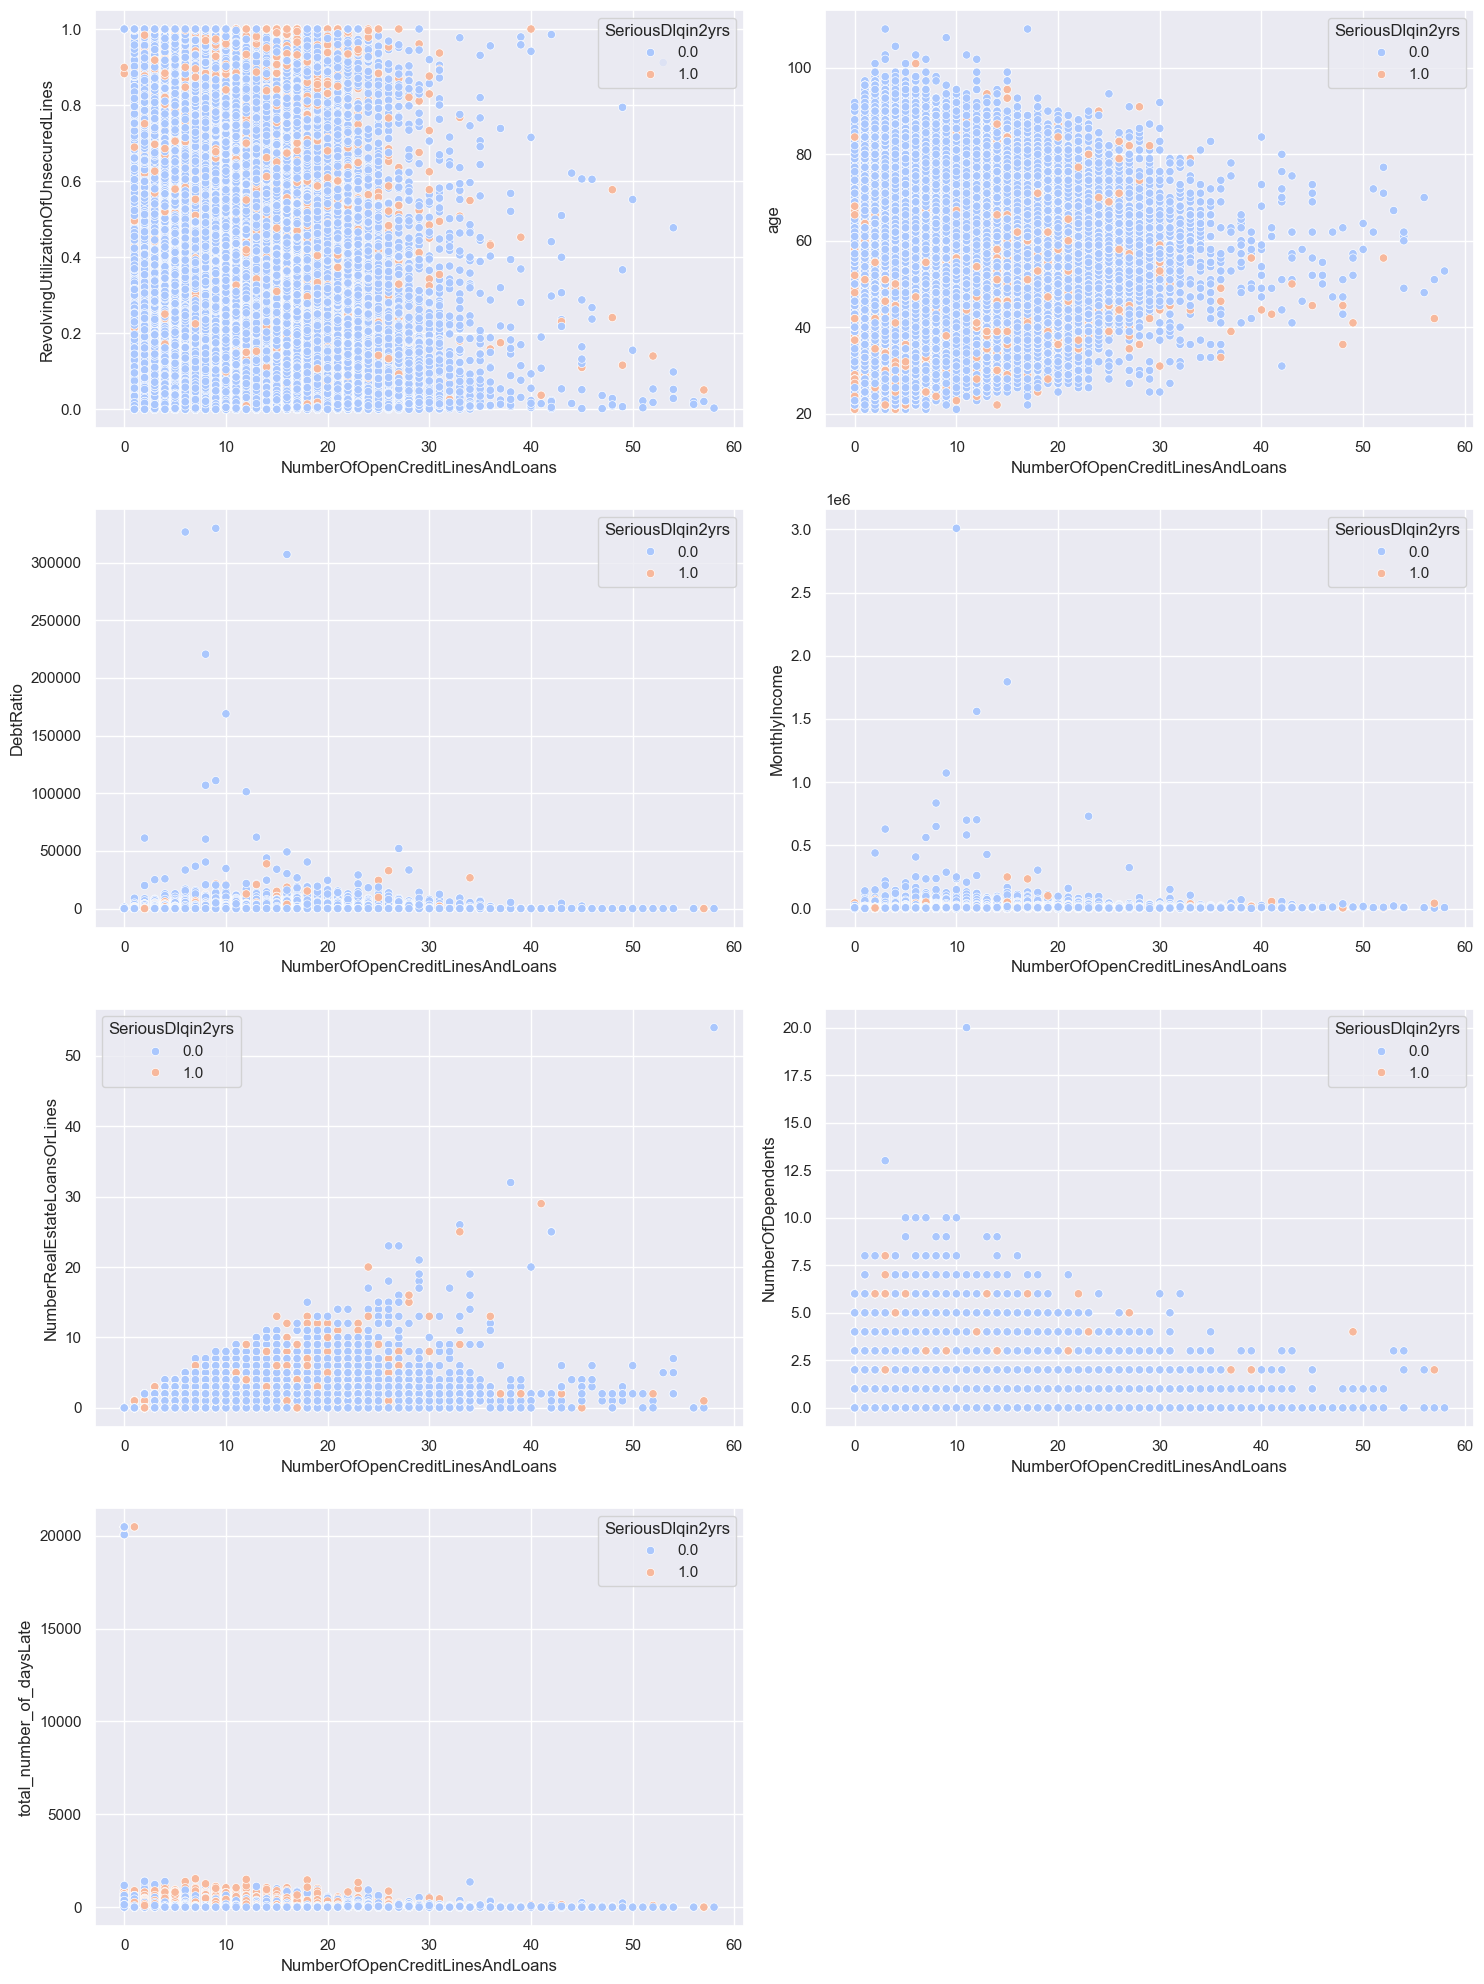

In [49]:
fig, axes = plt.subplots(4,2, figsize=(15, 20))
for i, x in enumerate(combined_df.drop(columns=['SeriousDlqin2yrs','ind','NumberOfOpenCreditLinesAndLoans']).columns):
    sns.scatterplot(combined_df, x='NumberOfOpenCreditLinesAndLoans', y=x , ax=axes[i//2,i%2], hue='SeriousDlqin2yrs', palette='coolwarm');
    
axes[3,1].axis('off');

---

#### BarChart between Number of Open Loans and Monthly Income

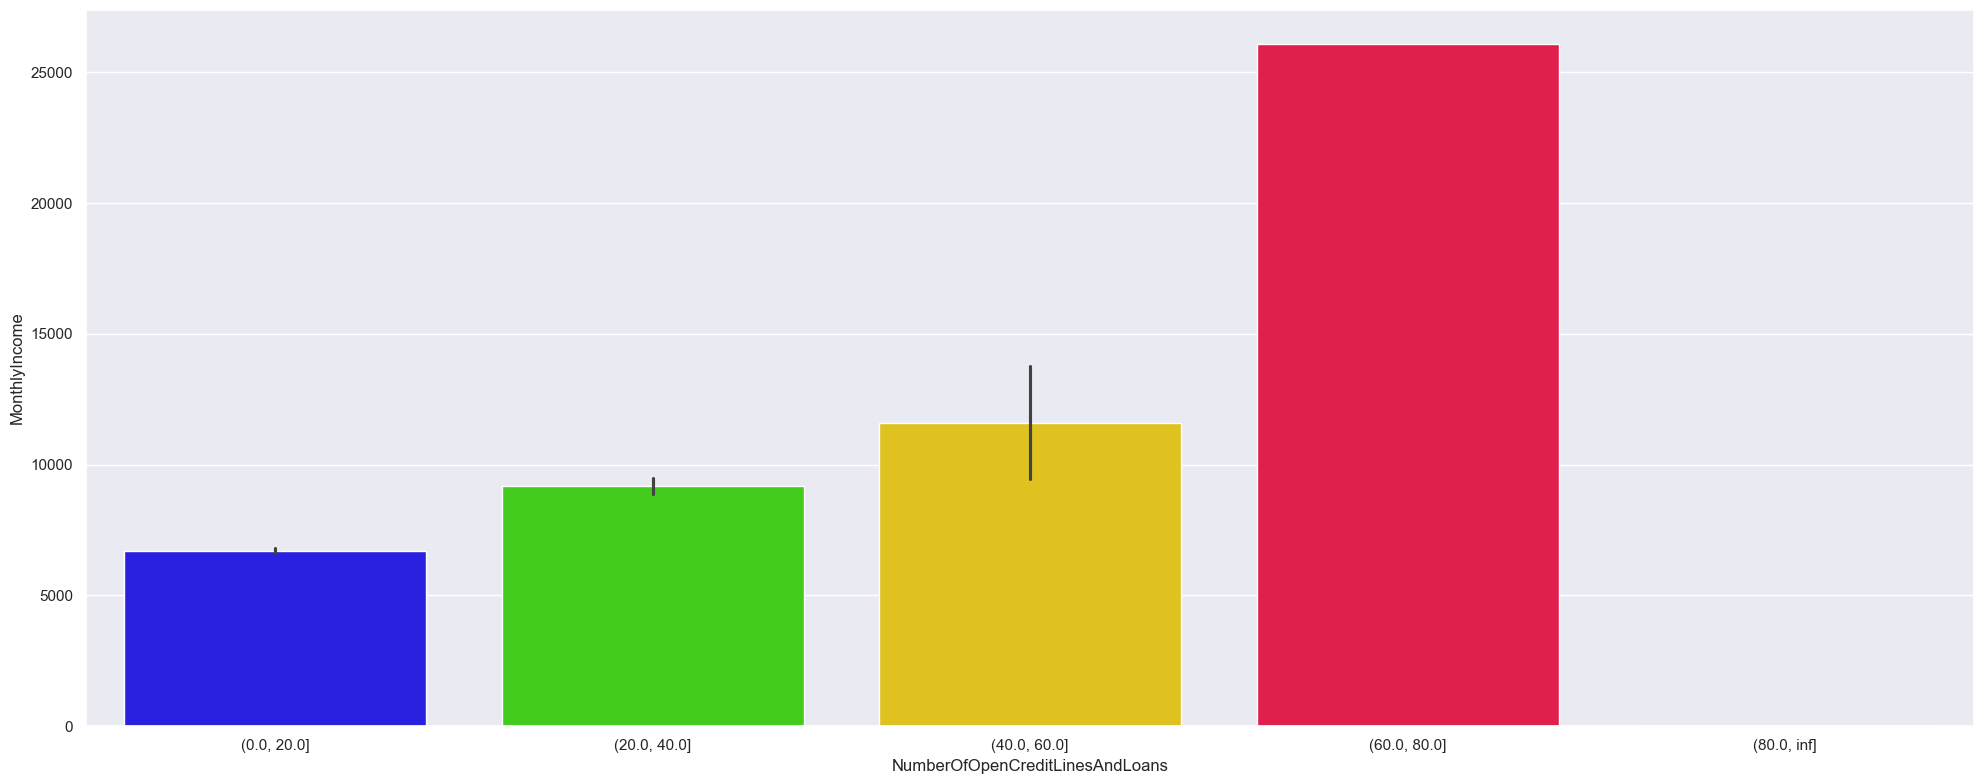

In [50]:
plt.figure(figsize=(20, 8))
sns.barplot(pd.DataFrame({'NumberOfOpenCreditLinesAndLoans':pd.cut(combined_df['NumberOfOpenCreditLinesAndLoans'], bins=[0,20,40,60,80,np.inf]),'MonthlyIncome':combined_df['MonthlyIncome']}), x='NumberOfOpenCreditLinesAndLoans', y='MonthlyIncome', palette='prism');

**Plot Inference:**
>-   In a The higher the Income, the more Loans People are likely to open

In [51]:
print(f"On Average, People have {int(combined_df['NumberOfOpenCreditLinesAndLoans'].mode()[0])} Open Credits and Loans altogether")

On Average, People have 6 Open Credits and Loans altogether


### <div style='text-align:center'>`NumberRealEstateLoansOrLines` Column</div>

In [52]:
dict_data.iloc[7][1]

'Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)'

**This columns represents  the customer's number of mortgage and real estate loans including home equity lines of credit the Customer had to his name**

In [53]:
combined_df['NumberRealEstateLoansOrLines'].value_counts()[:10]

0.0     94254
1.0     88008
2.0     52476
3.0     10723
4.0      3584
5.0      1141
6.0       547
7.0       279
8.0       151
9.0       127
10.0       60
Name: NumberRealEstateLoansOrLines, dtype: int64

you can see fewer people have many mortgage and real estate loans...

---

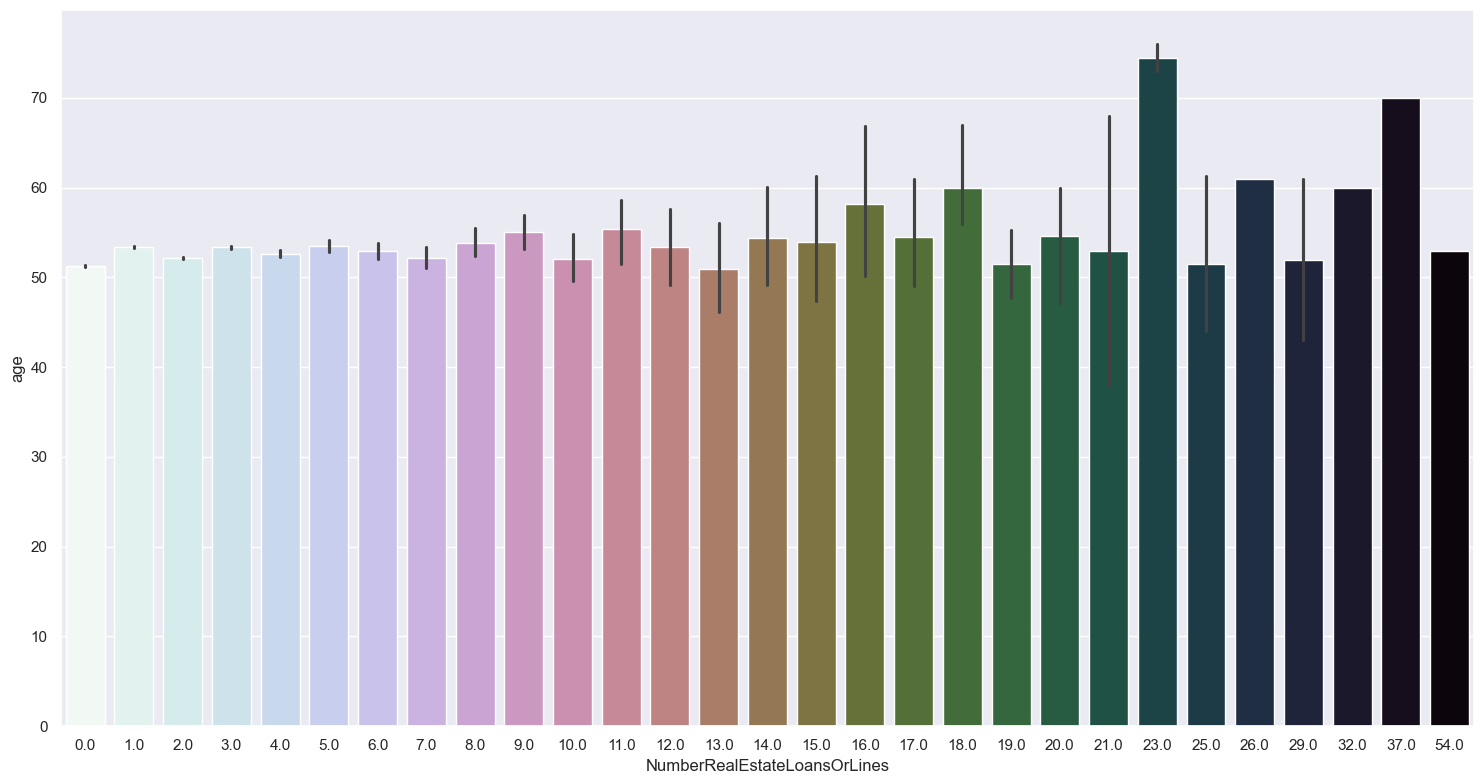

In [54]:
sns.barplot(combined_df, x='NumberRealEstateLoansOrLines', y='age', palette='cubehelix_r');

Older People Generally have the most number of open loans

---

#### Age VS. Income Barplot

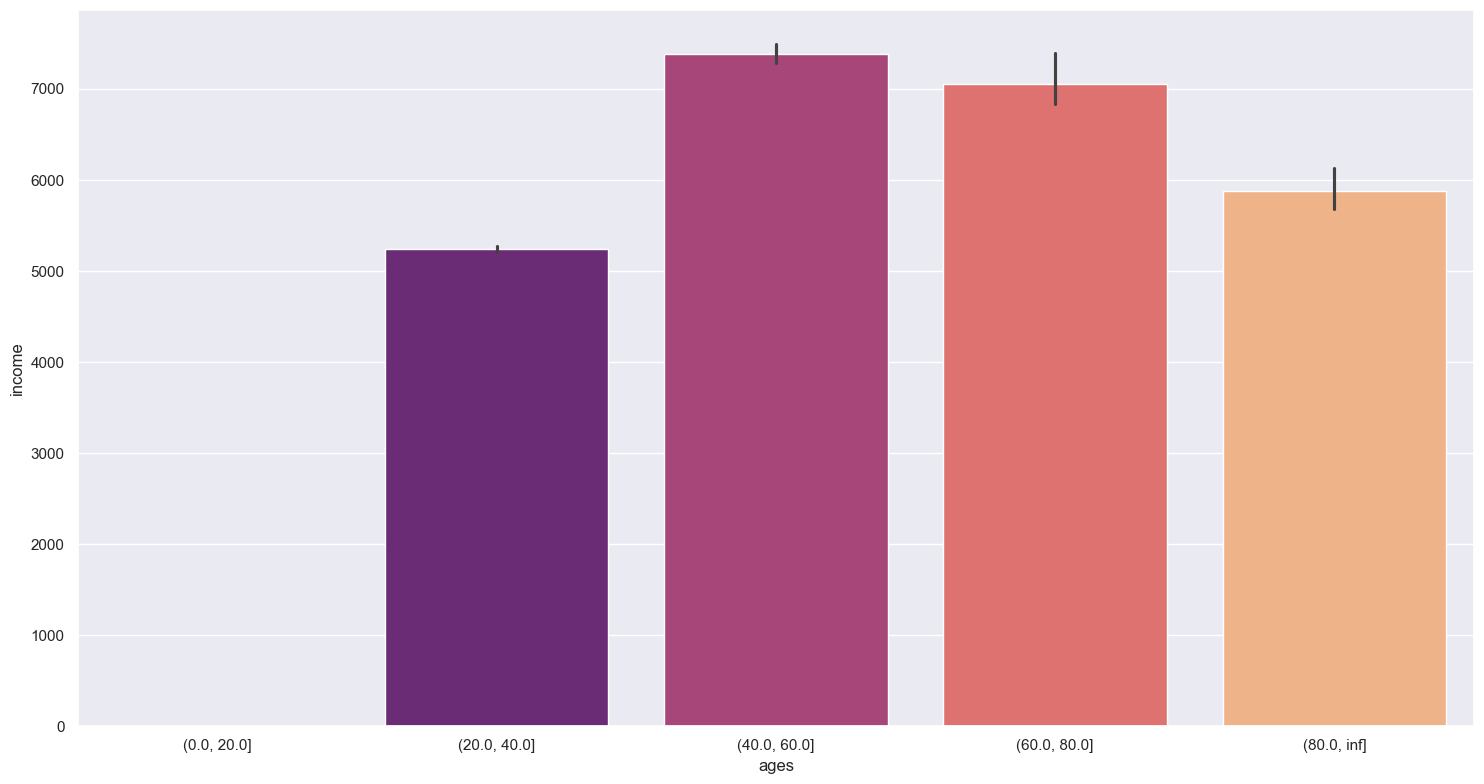

In [55]:
sns.barplot(pd.DataFrame({'ages': pd.cut(combined_df['age'], bins=[0,20,40,60,80,np.inf]), 'income':combined_df['MonthlyIncome']}), y='income', x='ages', palette='magma');

Adults generally earn more than youth and teenagers

---

In [56]:
dict_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [57]:
combined_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'ind',
       'total_number_of_daysLate'],
      dtype='object')

### <div style='text-align:center'>`NumberOfDependents` Column</div>

In [58]:
### Checkinf the desciption of the column from the dict_data
dict_data.iloc[11][1]

'Number of dependents in family excluding themselves (spouse, children etc.)'

Now we understand, good >>>

---

In [59]:
combined_df['NumberOfDependents'][combined_df['ind'] == 0].value_counts()[:10]

0.0     90826
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
Name: NumberOfDependents, dtype: int64

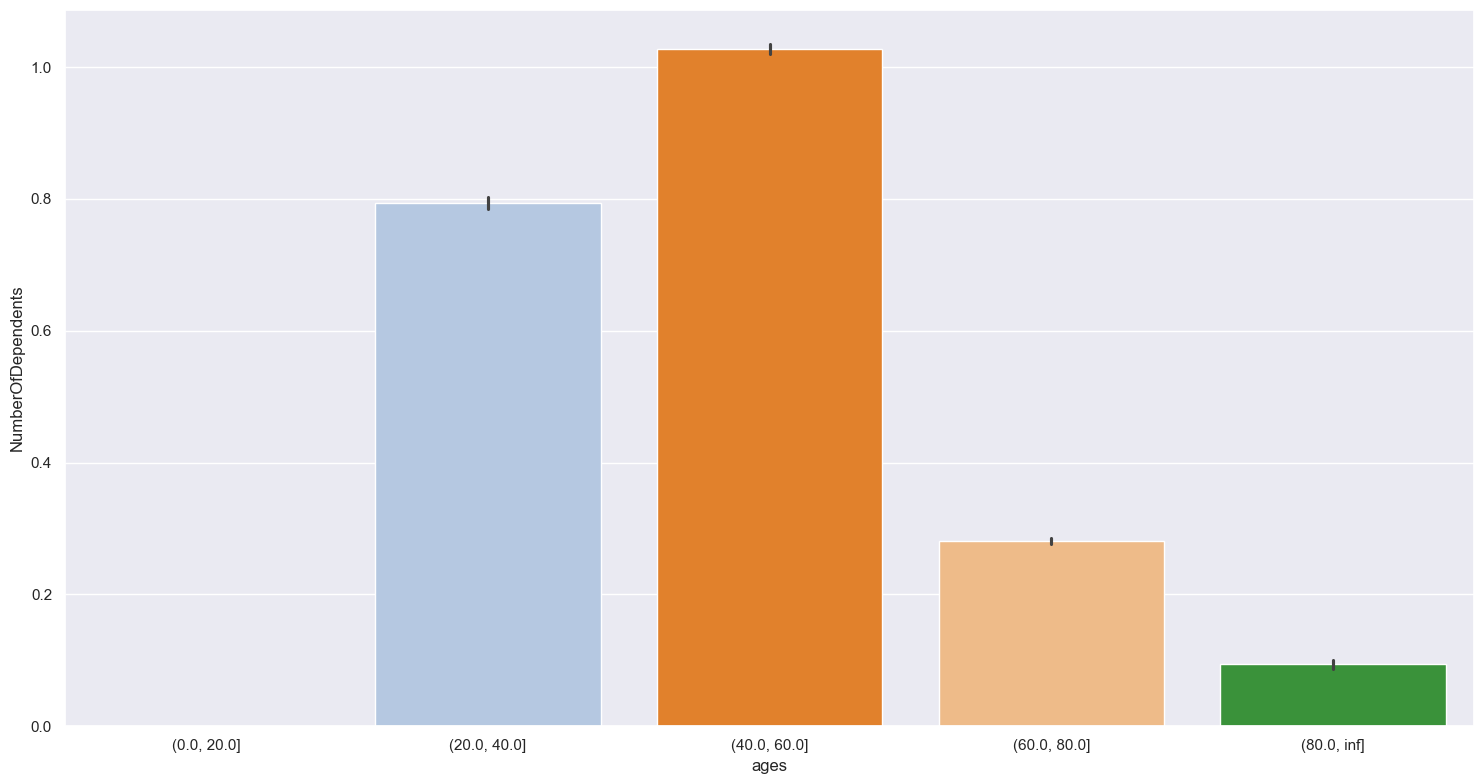

In [60]:
### Checking how age affects number of dependants
sns.barplot(pd.DataFrame({'ages': pd.cut(combined_df['age'], bins=[0,20,40,60,80,np.inf]), 'NumberOfDependents':combined_df['NumberOfDependents']}), y='NumberOfDependents', x='ages', palette='tab20');

People between ages 40 to 60 have the most number of dependants

---


### - `SeriousDlqin2yrs` (Target) Variable

In [61]:
describe(combined_df['SeriousDlqin2yrs'])

Value Counts:
0.0    139973
1.0     10026
Name: SeriousDlqin2yrs, dtype: int64

 
Dtype:
float64
 
 
Unique:
[ 1.  0. nan]
 
 
NUnique:
2


All's good except the values which are in float, would be better to astype to int64

In [62]:
combined_df['SeriousDlqin2yrs'] = pd.to_numeric(
    combined_df['SeriousDlqin2yrs'], errors='coerce').astype('Int64')

In [63]:
combined_df['SeriousDlqin2yrs'].dtype

Int64Dtype()

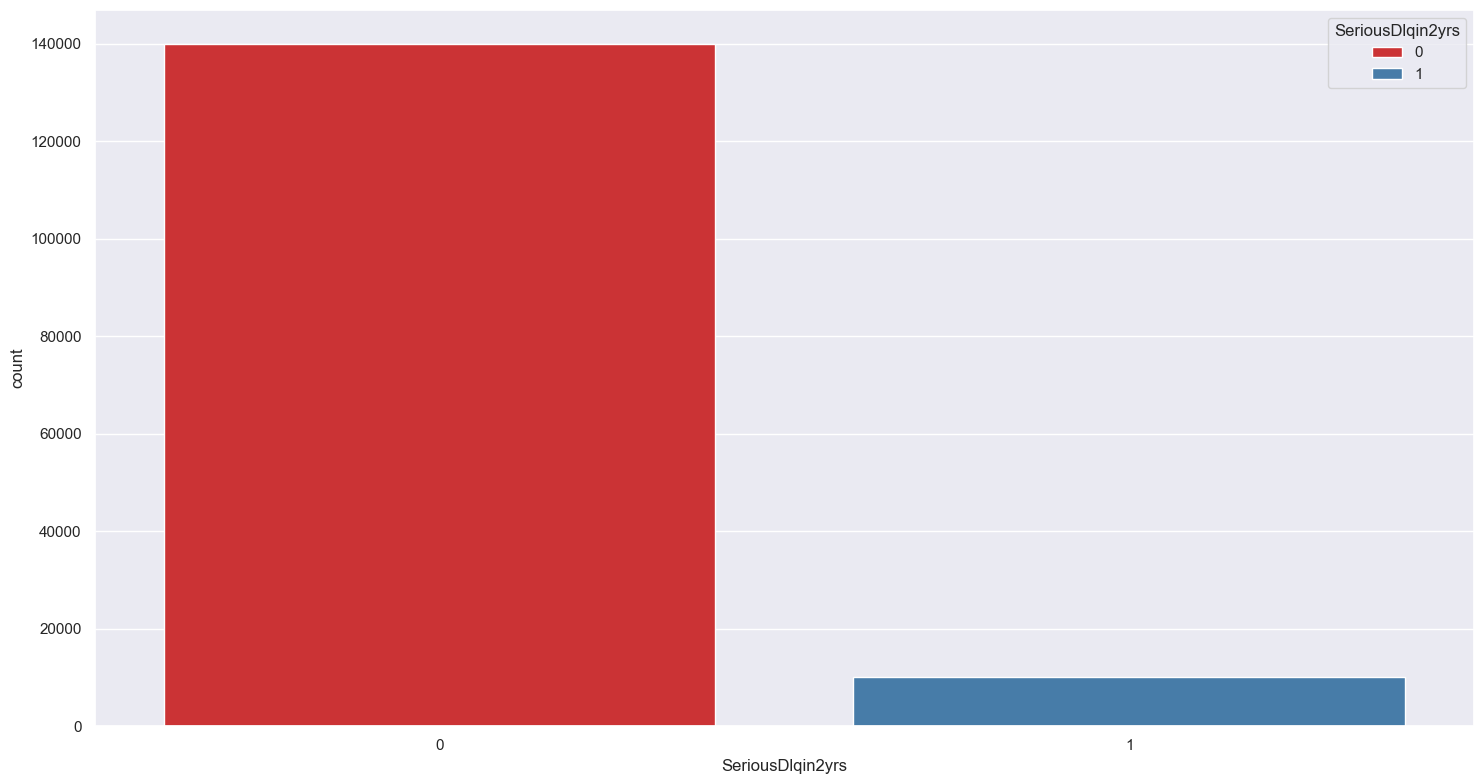

In [64]:
### Count Plot showing the Distribution of People who Dafult to people who do not
sns.countplot(
    data=combined_df[combined_df['ind']==0][combined_df['SeriousDlqin2yrs'].isna() == False],
    x='SeriousDlqin2yrs',
    hue='SeriousDlqin2yrs',
    palette='Set1');

- **Plot Inference**
    - Just a very few people defaulted, leading to a case of massive inbalance
    
**The training Data would be upsampled below**

---


There is an obvious class imbalance in this dataset, so we would have to upsample the train data

---

In [65]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149999 non-null  Int64  
 1   RevolvingUtilizationOfUnsecuredLines  251502 non-null  float64
 2   age                                   251502 non-null  float64
 3   DebtRatio                             251502 non-null  float64
 4   MonthlyIncome                         251502 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       251502 non-null  float64
 6   NumberRealEstateLoansOrLines          251502 non-null  float64
 7   NumberOfDependents                    251502 non-null  float64
 8   ind                                   251502 non-null  float64
 9   total_number_of_daysLate              251502 non-null  float64
dtypes: Int64(1), float64(9)
memory usage: 19.4 MB


In [66]:
### Splitting train and test back
train_df = combined_df[combined_df['ind'] == 0]
test_df = combined_df[combined_df['ind'] == 1]

In [67]:
train_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
ind                                     0
total_number_of_daysLate                0
dtype: int64

In [68]:
#Dropping rows with missing values
train_df.dropna(inplace=True)

In [69]:
print(f"Train Data shape:{train_df.shape}, Test Data shape:{test_df.shape}")

Train Data shape:(149999, 10), Test Data shape:(101503, 10)


**Now upsampling train data**

In [70]:
### Seperating the positive and negative classes
df_class_0 = train_df[train_df['SeriousDlqin2yrs'] == 0]
df_class_1 = train_df[train_df['SeriousDlqin2yrs'] == 1]

print(f"Class 1 shape:{df_class_1.shape}, Class 0 shape:{df_class_0.shape}")

Class 1 shape:(10026, 10), Class 0 shape:(139973, 10)


In [71]:
class_0_shape = df_class_0.shape[0]
class_1_shape = df_class_1.shape[0]

In [72]:
df_class_1_up = df_class_1.sample(class_0_shape, replace=True)

df_class_1_up.shape

(139973, 10)

In [73]:
train_df = pd.concat([df_class_0, df_class_1_up], axis=0)
train_df.shape

(279946, 10)

In [74]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ind,total_number_of_daysLate
1,0,0.957151,40.0,0.121876,2600.0,4.0,0.0,1.0,0.0,0.0
2,0,0.658180,38.0,0.085113,3042.0,2.0,0.0,0.0,0.0,134.5
3,0,0.233810,30.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,0.024926,63588.0,7.0,1.0,0.0,0.0,44.5
5,0,0.213179,74.0,0.375607,3500.0,3.0,1.0,1.0,0.0,0.0


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279946 entries, 1 to 141956
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      279946 non-null  Int64  
 1   RevolvingUtilizationOfUnsecuredLines  279946 non-null  float64
 2   age                                   279946 non-null  float64
 3   DebtRatio                             279946 non-null  float64
 4   MonthlyIncome                         279946 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       279946 non-null  float64
 6   NumberRealEstateLoansOrLines          279946 non-null  float64
 7   NumberOfDependents                    279946 non-null  float64
 8   ind                                   279946 non-null  float64
 9   total_number_of_daysLate              279946 non-null  float64
dtypes: Int64(1), float64(9)
memory usage: 23.8 MB


#### <u> Correlation Matrix </u>

We dont want highly corrolated columns in our data, so our model doesn't underfit
Let's go ahead to use a heatmap to view thier correlation, and remove any highly correlated columns;

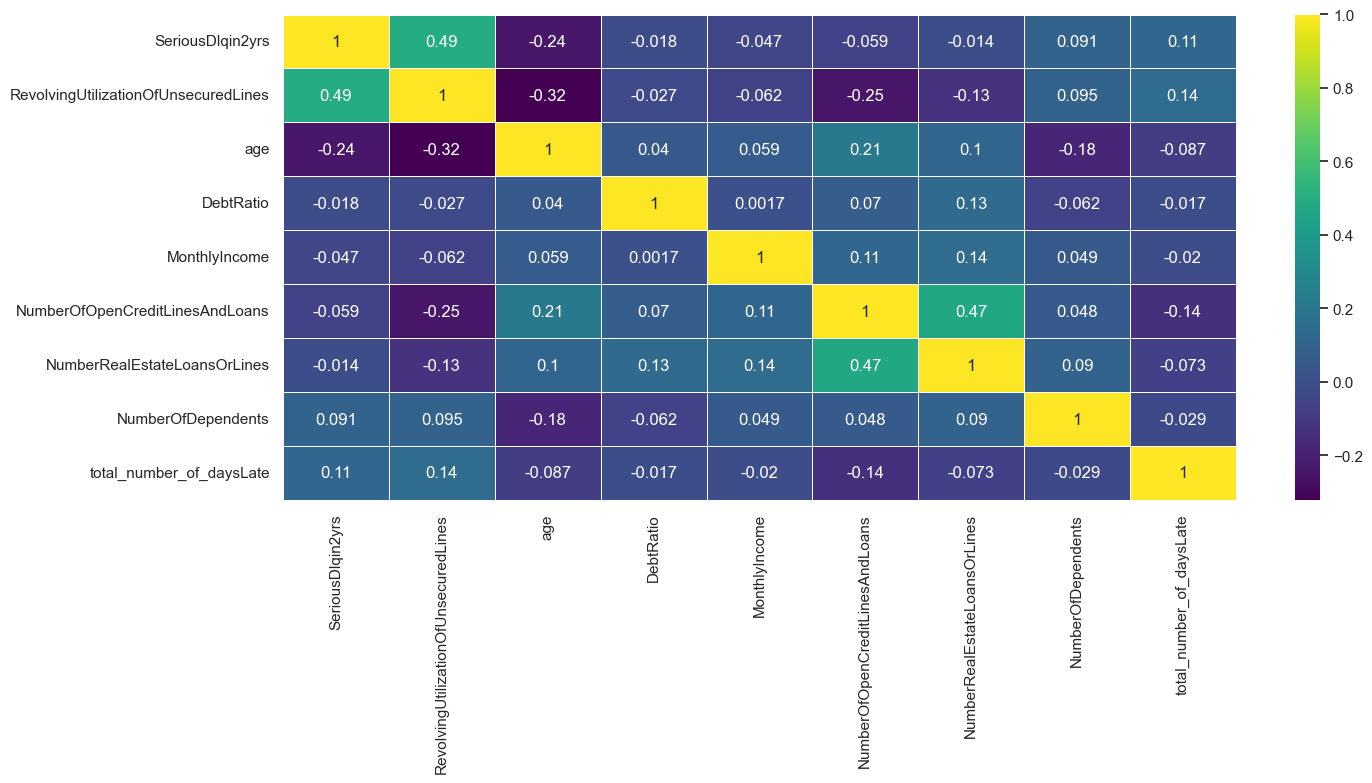

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df .drop(columns=['ind']).corr(), annot=True, cmap='viridis',linewidths=0.5);

Looks Like the correation between our features are moderate, moving on...

---

### Former Cleaning Function

```py
# Function to perform data cleaning on both the trin and test data
def data_cleaning(df):
    ## Dropping unnecessary columns
    df.drop(columns='Unnamed: 0', inplace=True)
    
    
    ## Dealing with missing values
    df = df[df.isnull().sum(axis=1) < 3] 
    #We can't drop all the rows missing income, so we can fill with the mean salary of he corresponding age
    salary_replace={}
    for x in df['age'][df['age'].isna() == False].unique():
        if x >= 18:
            if len(df['MonthlyIncome'][df['age']== x] ) >= 10 :
                avg_salary = df[df['age']==x]['MonthlyIncome'].mode()
                salary_replace.update({x:int(avg_salary[0])})
        else:
            pass
            
    df['MonthlyIncome'].fillna(df['age'].map(salary_replace), inplace=True)
    
    
    # Proceeding to remove the percentage columns with abnormally high values
    df = df[df['DebtRatio'] <= 1]
    df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 1]
    
    # Removing rows with data of underaged ppl because they are not eligible
    df['age'] = df['age'][df['age']>= 18] 
    
    def remove_outliers(df_column, threshold=1.5):
        Q1 = df_column.quantile(0.25)
        Q3 = df_column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_column = df_column[(df_column >= lower_bound) & (df_column <= upper_bound)]

        return df_column
    
    
    
    for x in df['age'][df['age'].isna() == False].unique():
        df['MonthlyIncome'][df['age'] == x] = remove_outliers(df['MonthlyIncome'][df['age'] == x])
    

    dependants_replace={}
    for x in df['NumberRealEstateLoansOrLines'][df['NumberRealEstateLoansOrLines'].isna() == False].unique():
        if len(df['NumberOfDependents'][df['NumberRealEstateLoansOrLines']== x] ) >= 10 :
            avg_depend = df['NumberOfDependents'][df['NumberRealEstateLoansOrLines']==x].median()
            dependants_replace.update({x:int(avg_depend)})
    df['NumberOfDependents'].fillna(df['NumberRealEstateLoansOrLines'].map(dependants_replace), inplace=True)
    
    

    
    # Droping all missing values that do not meet our condition for filling
    df.dropna(subset=['MonthlyIncome', 'age', 'NumberOfDependents'], inplace=True)
    
    # Converting a few columns to most appropriate type
    for x in ['SeriousDlqin2yrs', 'NumberOfDependents', 'age' ]:
        df[x] = df[x].astype('int64')
        
    df['age'] = df['age'][ df['age'] > 0]

    
    # Dropping highly correlated columns
    df.drop(columns=['NumberOfTimes90DaysLate'], inplace=True)
   
    return df
    
``` 

In [77]:
train_df['SeriousDlqin2yrs'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

### Checking for duplicates in the data

In [78]:
train_df.reset_index(inplace=True)

In [79]:
len(train_df[train_df.duplicated() == True])

129947

No duplicates, Perfect!!!


---

## Feature Engineering

In [80]:
train_df.head()

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ind,total_number_of_daysLate
0,1,0,0.957151,40.0,0.121876,2600.0,4.0,0.0,1.0,0.0,0.0
1,2,0,0.658180,38.0,0.085113,3042.0,2.0,0.0,0.0,0.0,134.5
2,3,0,0.233810,30.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
3,4,0,0.907239,49.0,0.024926,63588.0,7.0,1.0,0.0,0.0,44.5
4,5,0,0.213179,74.0,0.375607,3500.0,3.0,1.0,1.0,0.0,0.0


In [81]:
train_df.columns

Index(['index', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'ind',
       'total_number_of_daysLate'],
      dtype='object')

In [82]:
def feature_engineering(df):
    df['AgeCategory'] = pd.cut(df['age'], bins=[0, 25, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])
    df['IncomeToDebtRatio'] = df['MonthlyIncome'] / (df['DebtRatio'] + 1) 
    df['TotalNumCreditLines'] = df['NumberOfOpenCreditLinesAndLoans'] + df['NumberRealEstateLoansOrLines']
    df['DependentsRatio'] = df['NumberOfDependents'] / (df['TotalNumCreditLines'] + 1) 
    return df

In [83]:
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

#### Correllation matrx, after feature Eng

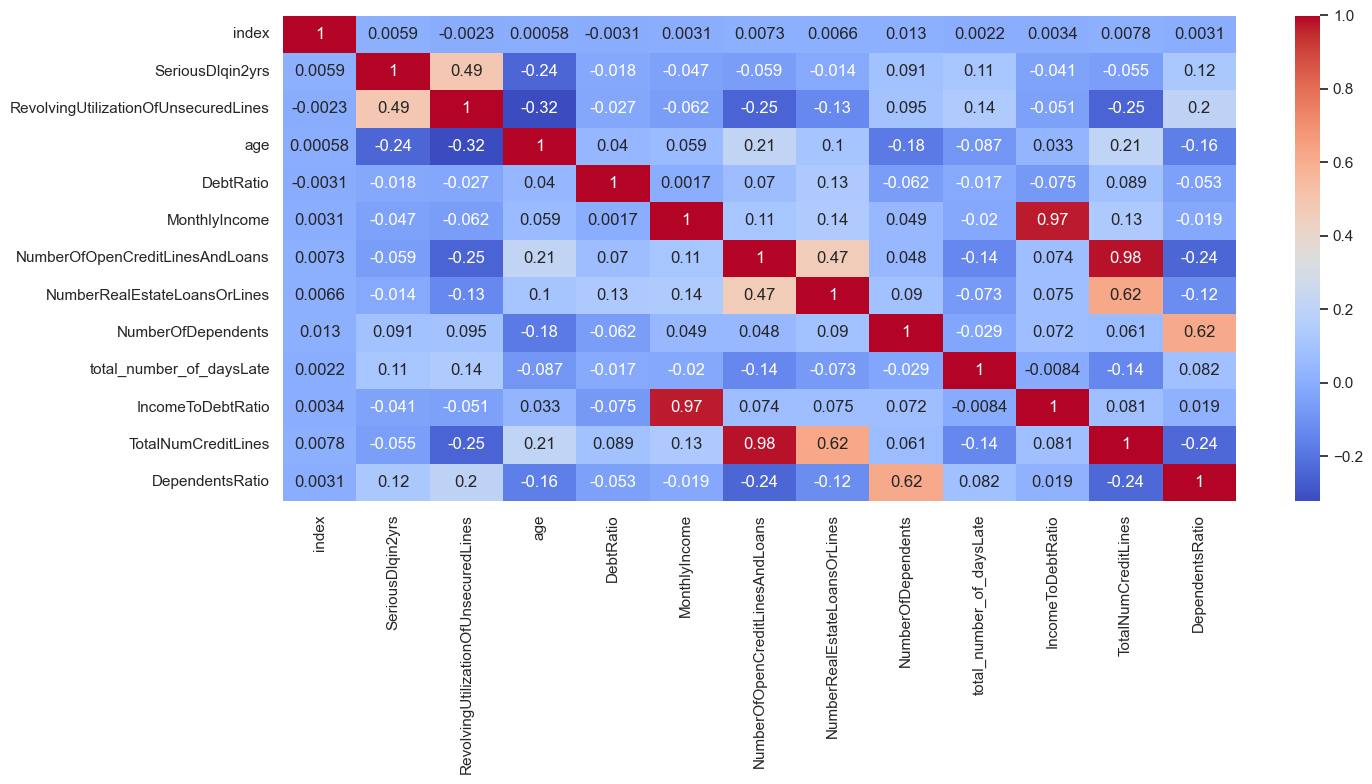

In [84]:
sns.heatmap(train_df.drop(columns=['ind']).corr(), annot=True, cmap='coolwarm');

### Encoding Categorical Features and Scaling the numeric using Column Transform

In [85]:
# dropping the index column in the training data, and the indicator column in both of the data
train_df.drop(columns=['index', 'ind'], inplace=True)
test_df.drop(columns=['ind'], inplace=True)

In [86]:
cat_cols = []
for x in train_df.columns:
    if x == 'SeriousDlqin2yrs':
        pass
    elif len(train_df[x].unique()) <= 30:
        cat_cols.append(x)
    else:
        pass

In [87]:
num_cols = []
for x in train_df.columns:
    if x == 'SeriousDlqin2yrs':
        pass
    elif x in cat_cols:
        pass
    else:
        num_cols.append(x)

In [88]:
num_cols,cat_cols

(['RevolvingUtilizationOfUnsecuredLines',
  'age',
  'DebtRatio',
  'MonthlyIncome',
  'NumberOfOpenCreditLinesAndLoans',
  'total_number_of_daysLate',
  'IncomeToDebtRatio',
  'TotalNumCreditLines',
  'DependentsRatio'],
 ['NumberRealEstateLoansOrLines', 'NumberOfDependents', 'AgeCategory'])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = train_df.drop('SeriousDlqin2yrs', axis=1)
y = train_df['SeriousDlqin2yrs']

In [91]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [92]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [93]:
preprocessor = ColumnTransformer(
    transformers = [('cat',encoder,cat_cols),
                   ('num', scaler, num_cols)]
    ,
    remainder='passthrough'
)

In [94]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [95]:
X_test_preprocessed = preprocessor.transform(X_val)

In [96]:
X_train = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

In [97]:
#Inspecting 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223956 entries, 0 to 223955
Data columns (total 54 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   cat__NumberRealEstateLoansOrLines_0.0      223956 non-null  float64
 1   cat__NumberRealEstateLoansOrLines_1.0      223956 non-null  float64
 2   cat__NumberRealEstateLoansOrLines_2.0      223956 non-null  float64
 3   cat__NumberRealEstateLoansOrLines_3.0      223956 non-null  float64
 4   cat__NumberRealEstateLoansOrLines_4.0      223956 non-null  float64
 5   cat__NumberRealEstateLoansOrLines_5.0      223956 non-null  float64
 6   cat__NumberRealEstateLoansOrLines_6.0      223956 non-null  float64
 7   cat__NumberRealEstateLoansOrLines_7.0      223956 non-null  float64
 8   cat__NumberRealEstateLoansOrLines_8.0      223956 non-null  float64
 9   cat__NumberRealEstateLoansOrLines_9.0      223956 non-null  float64
 10  cat__Num

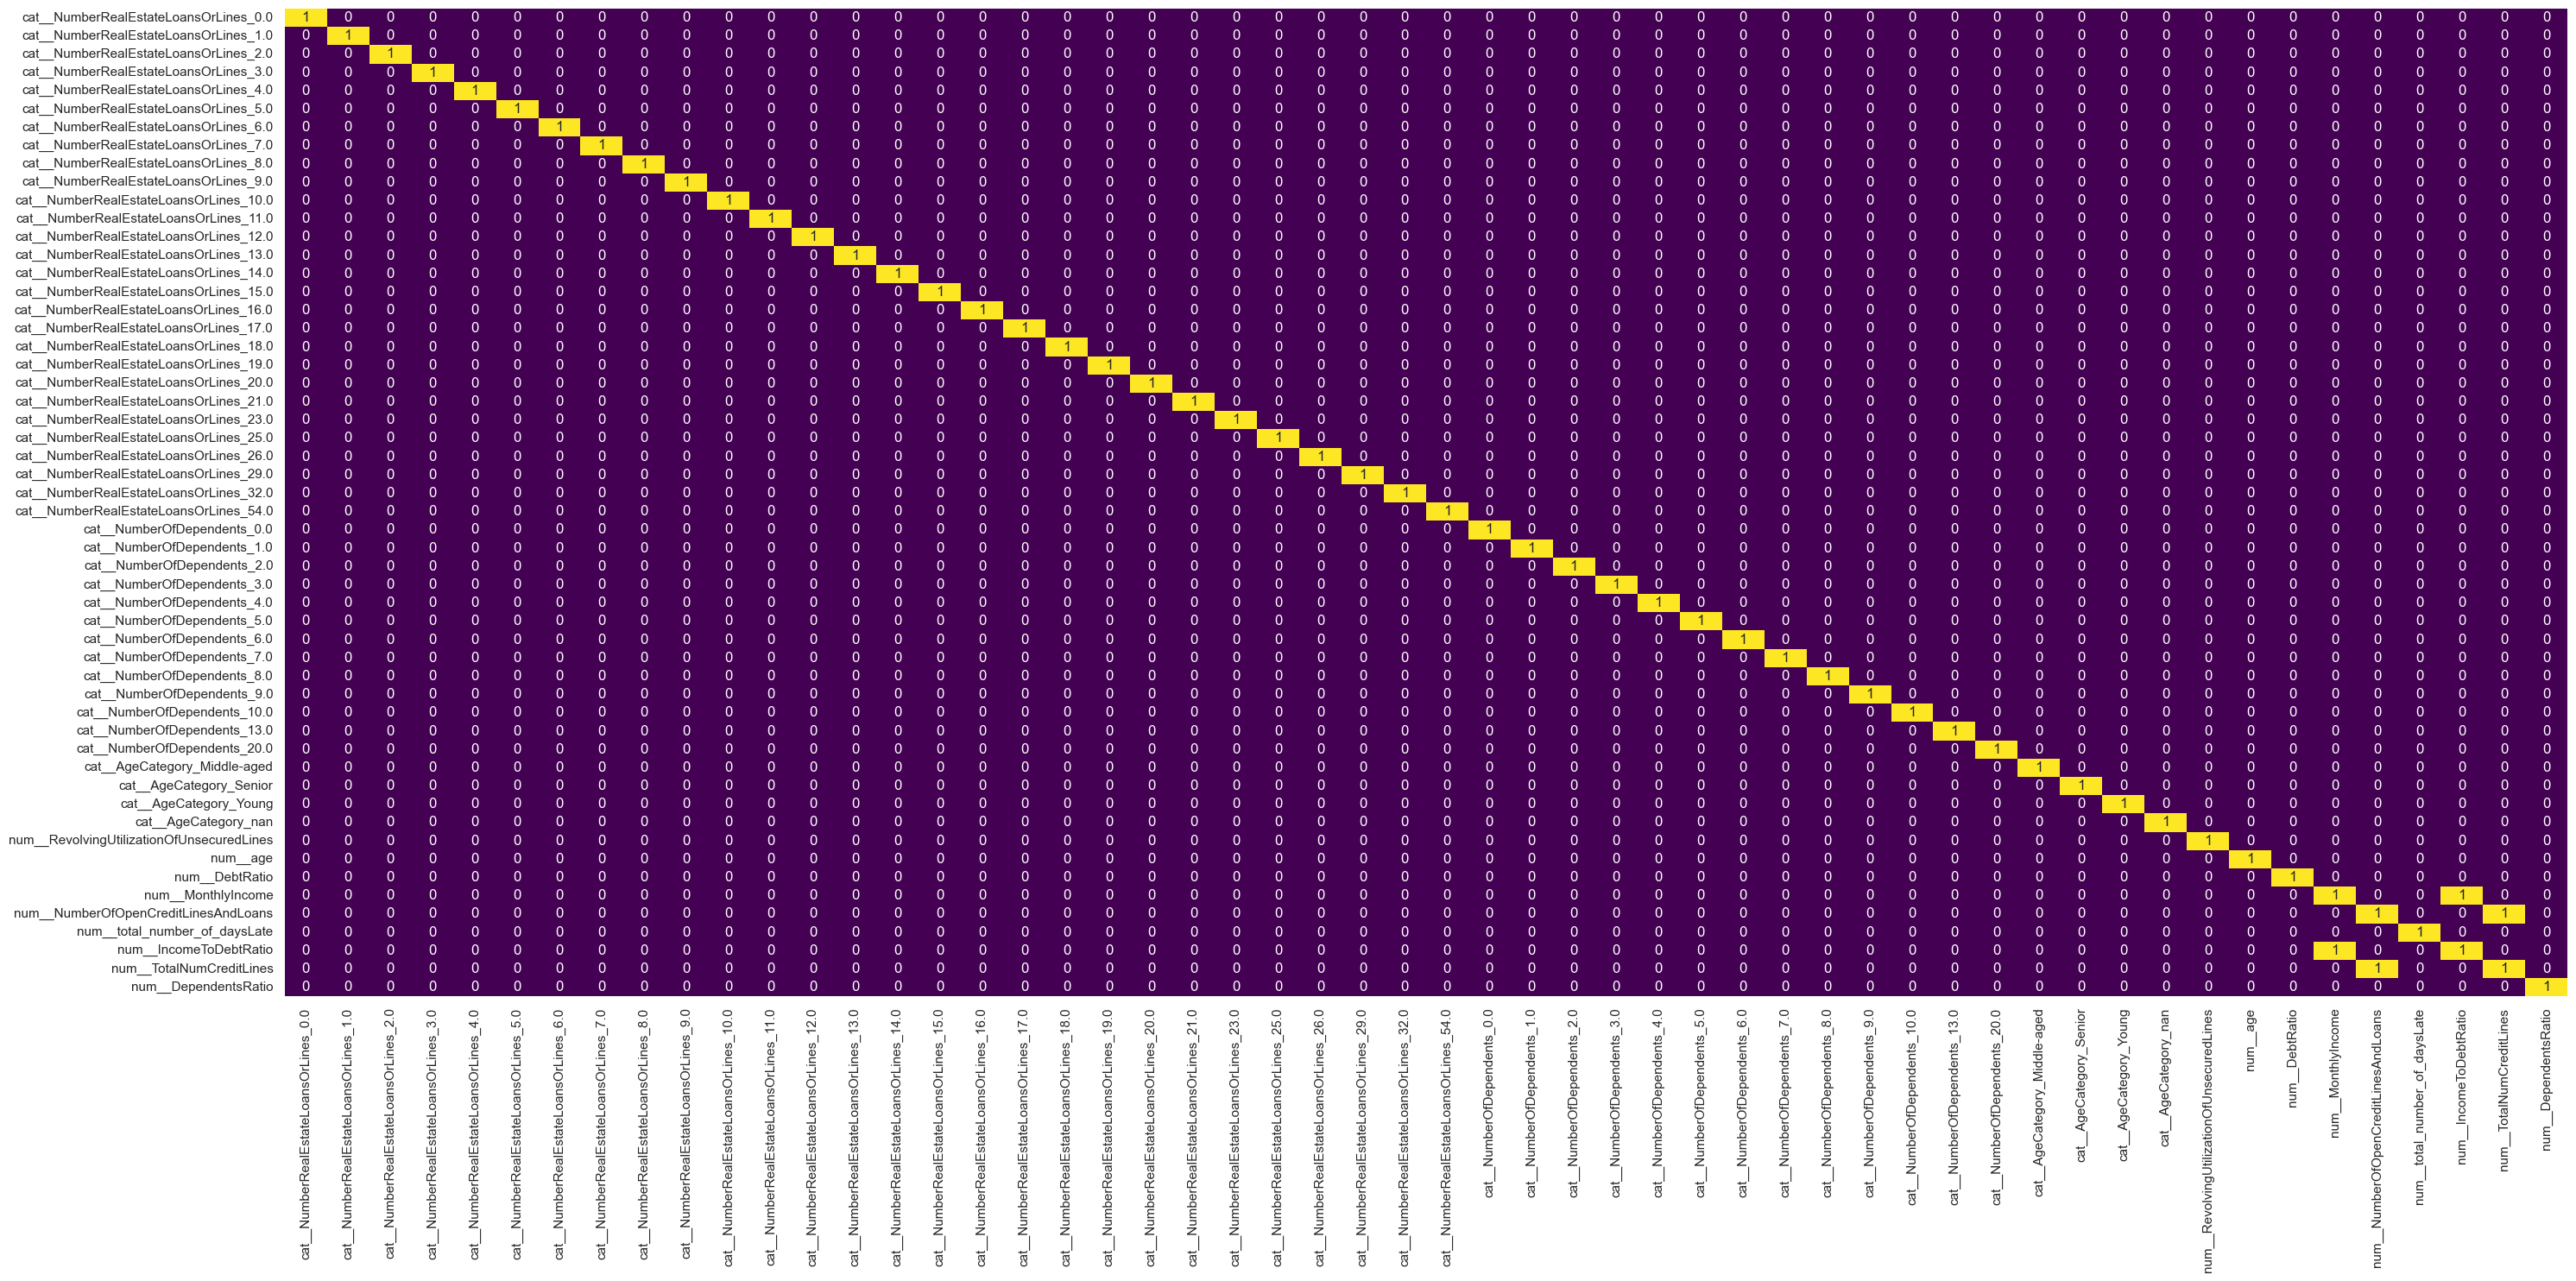

In [98]:
plt.figure(figsize=(30,15))
sns.heatmap(X_train.corr()>0.9 , annot = True, cbar= False, cmap='viridis');

In [99]:
X_train.drop(columns=['num__IncomeToDebtRatio','num__NumberOfOpenCreditLinesAndLoans'], inplace=True)

In [100]:
### Doing same for val dataset, so we don''t have conflicting number of features
X_val.drop(columns=['num__IncomeToDebtRatio','num__NumberOfOpenCreditLinesAndLoans'], inplace=True)

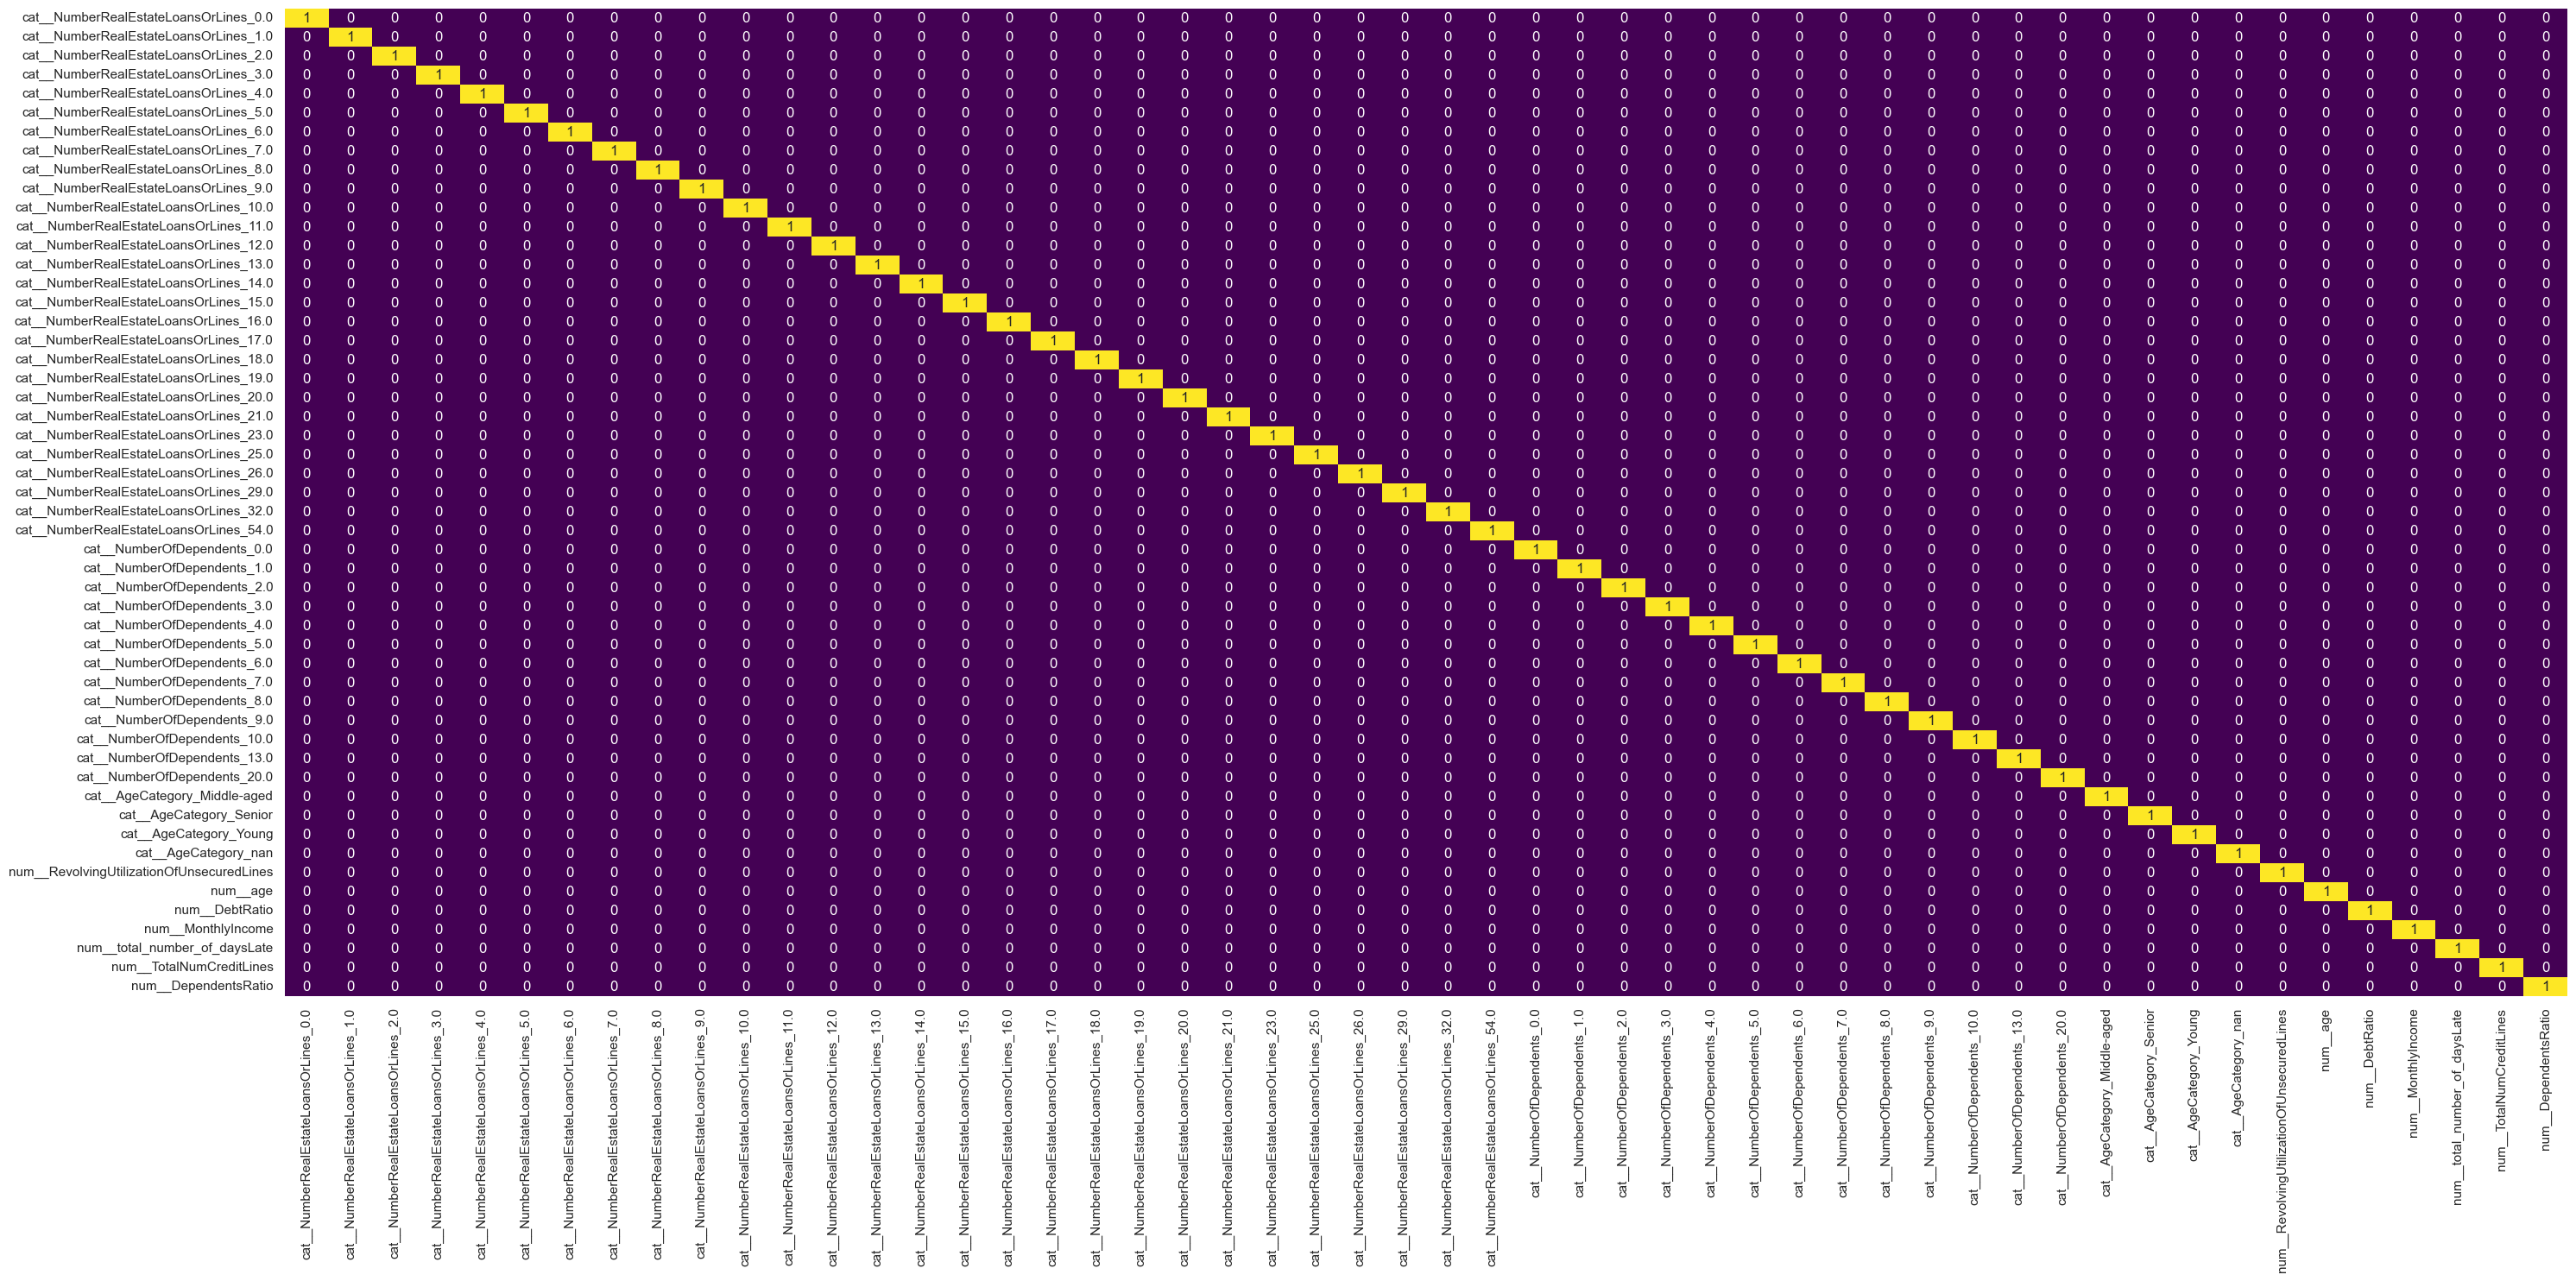

In [101]:
plt.figure(figsize=(30,15))
sns.heatmap(X_train.corr()>0.9 , annot = True, cbar= False, cmap='viridis');

In [102]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_val.shape}")

X_train shape: (223956, 52), X_test shape: (55990, 52)


In [103]:
X_val

,cat__NumberRealEstateLoansOrLines_0.0,cat__NumberRealEstateLoansOrLines_1.0,cat__NumberRealEstateLoansOrLines_2.0,cat__NumberRealEstateLoansOrLines_3.0,cat__NumberRealEstateLoansOrLines_4.0,cat__NumberRealEstateLoansOrLines_5.0,cat__NumberRealEstateLoansOrLines_6.0,cat__NumberRealEstateLoansOrLines_7.0,cat__NumberRealEstateLoansOrLines_8.0,cat__NumberRealEstateLoansOrLines_9.0,...,cat__AgeCategory_Senior,cat__AgeCategory_Young,cat__AgeCategory_nan,num__RevolvingUtilizationOfUnsecuredLines,num__age,num__DebtRatio,num__MonthlyIncome,num__total_number_of_daysLate,num__TotalNumCreditLines,num__DependentsRatio
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.235143,-1.628969,-0.184992,0.257066,-0.103850,-0.031417,-0.427454
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.206515,0.327789,-0.184796,-0.275770,-0.028210,-0.195827,0.351517
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.174869,0.677210,-0.185153,-0.001258,-0.128876,-0.524649,-0.427454
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.175388,-1.000011,-0.184956,-0.294025,-0.078825,1.283869,-0.427454
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.937358,0.118136,-0.185107,-0.172325,-0.036927,-0.031417,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.294832,-1.349432,-0.185056,-0.236619,0.038151,-0.689059,0.741002
55986,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.294832,-0.021632,-0.184994,-0.256367,-0.027648,-0.360238,-0.427454
55987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.217878,-1.209664,-0.184909,-0.489202,-0.128876,-0.195827,-0.037969
55988,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.291819,0.048252,-0.184748,0.304827,-0.128876,-0.195827,0.351517


### <u> Model Training </u> 

In [104]:
np.array(X_val).shape

(55990, 52)

In [105]:
### Dictionary to host model performancefor eventual analysis
perf_dic = {}

In [106]:
### Helper function to make model training nd evaluation easy
def predict_report(model,model_name, X_train=X_train,X_val=X_val, Y_val=Y_val, Y_train=Y_train):
    perf_lst = []
    temp_dict = {model_name:perf_lst}
    model.fit(X_train, Y_train)
    ### Model Performance on Data it has seen
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_roc_auc = roc_auc_score(Y_train, train_predictions)
    train_f1 = accuracy_score(Y_train, train_predictions)
    print(f'The accuracy score of our model on the Training set is: {train_accuracy * 100 : 2f}%')
    print(f'The ROC-AUC score of our model on the Training set is: {train_roc_auc * 100 : 2f}%')
    print(f'The F1 score of our model on the Training set is: {train_f1*100 : 2f}%', '\n\n')
    
    ### Model Performance on Data it has not seen
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_roc_auc = roc_auc_score(Y_val, val_predictions)
    val_f1 = accuracy_score(Y_val, val_predictions)
    perf_lst.append(f'{val_accuracy*100:.2f}%')
    perf_lst.append(f'{val_roc_auc*100:.2f}%')
    perf_lst.append(f'{val_f1*100:.2f}%')
    print(f'The accuracy score of our model on the Validation set is: {val_accuracy * 100 : 2f}%')
    print(f'The ROC-AUC score of our model on the Validation set is: {val_roc_auc * 100 : 2f}%')
    print(f'The F1 score of our model on the Validation set is: {val_f1*100 : 2f}%', '\n\n')
    
    print('Classification report on Validation set')
    print(classification_report(Y_val, val_predictions))
    
    plt.figure(figsize=(15,8))
    sns.heatmap(confusion_matrix(Y_val, val_predictions, normalize='true'), annot=True, cmap='coolwarm_r')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title("Confusion Matrix on Model Performance over Val dataset")
    perf_dic.update(temp_dict)

---

### Building a Baseline Model with Logistic Regression

The accuracy score of our model on the Training set is:  75.135741%
The ROC-AUC score of our model on the Training set is:  75.135741%
The F1 score of our model on the Training set is:  75.135741% 


The accuracy score of our model on the Validation set is:  74.963386%
The ROC-AUC score of our model on the Validation set is:  74.963386%
The F1 score of our model on the Validation set is:  74.963386% 


Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75     27995
         1.0       0.76      0.74      0.75     27995

    accuracy                           0.75     55990
   macro avg       0.75      0.75      0.75     55990
weighted avg       0.75      0.75      0.75     55990



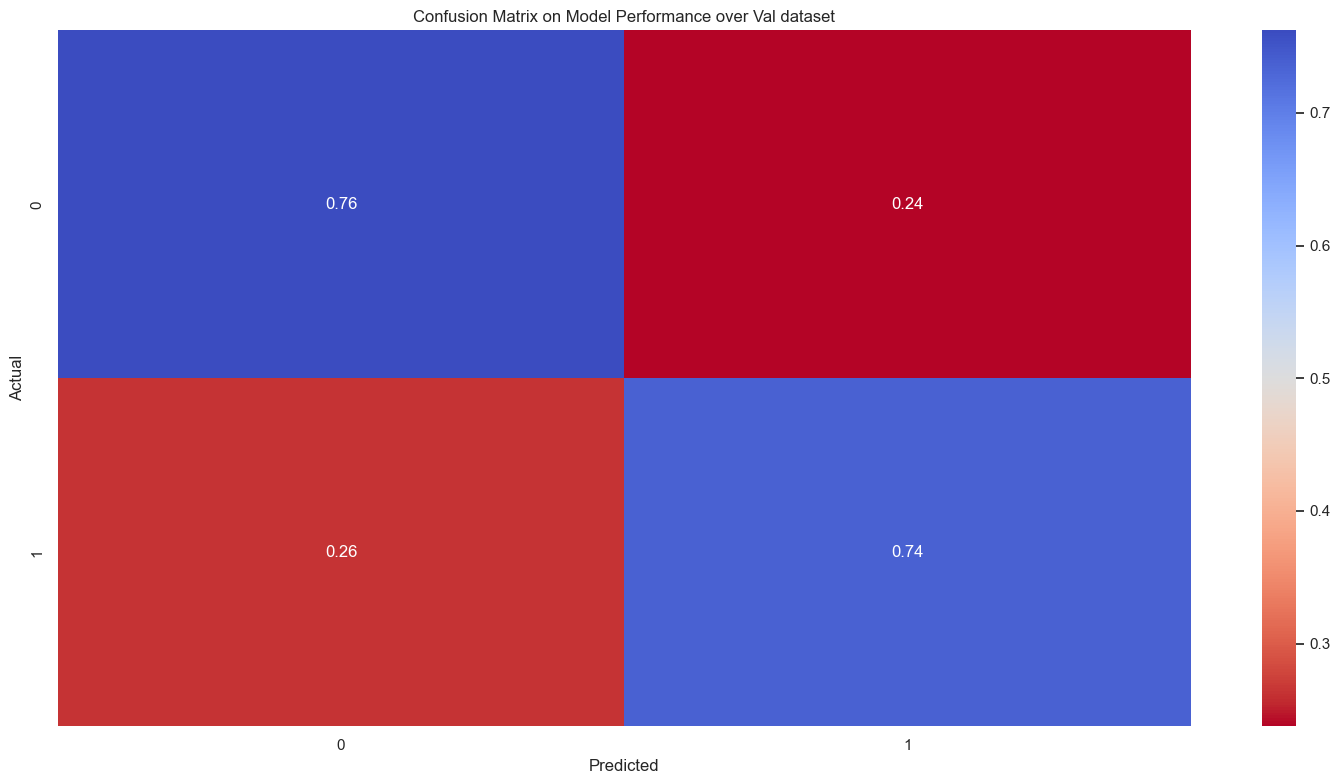

In [107]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
predict_report(lr, 'LogisticRegression')


**Getting Feature Importance of the lr Model**

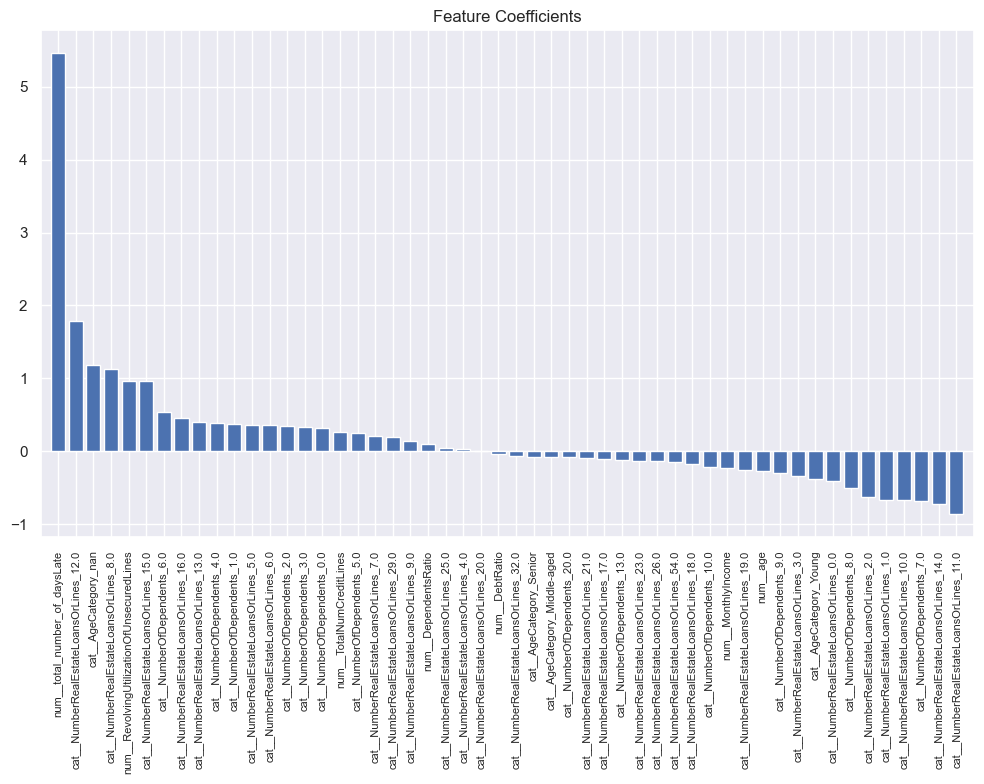

In [108]:
coefficients = lr.coef_[0]
feature_names = X_train.columns

# Sort coefficients in descending order
indices = coefficients.argsort()[::-1]

# Visualization
plt.figure(figsize=(10, 8))
plt.title("Feature Coefficients")
plt.bar(range(X_train.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Logistic Regression Looking Good, Let's try other models

---

### XGBoost Algorithm

The accuracy score of our model on the Training set is:  84.409438%
The ROC-AUC score of our model on the Training set is:  84.409438%
The F1 score of our model on the Training set is:  84.409438% 


The accuracy score of our model on the Validation set is:  83.402393%
The ROC-AUC score of our model on the Validation set is:  83.402393%
The F1 score of our model on the Validation set is:  83.402393% 


Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     27995
         1.0       0.83      0.84      0.84     27995

    accuracy                           0.83     55990
   macro avg       0.83      0.83      0.83     55990
weighted avg       0.83      0.83      0.83     55990



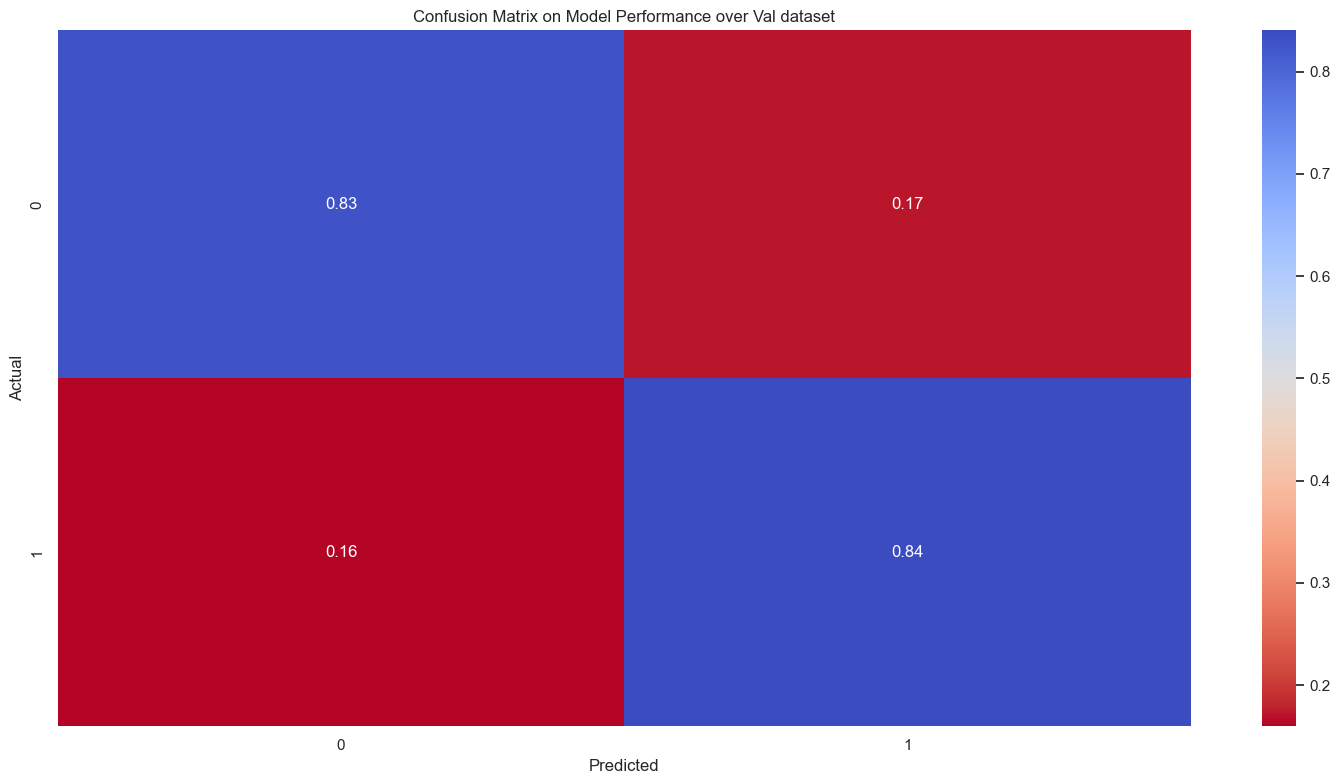

In [109]:
xgbmodel = XGBClassifier(n_jobs=-1)
predict_report(xgbmodel, 'XGBoost')

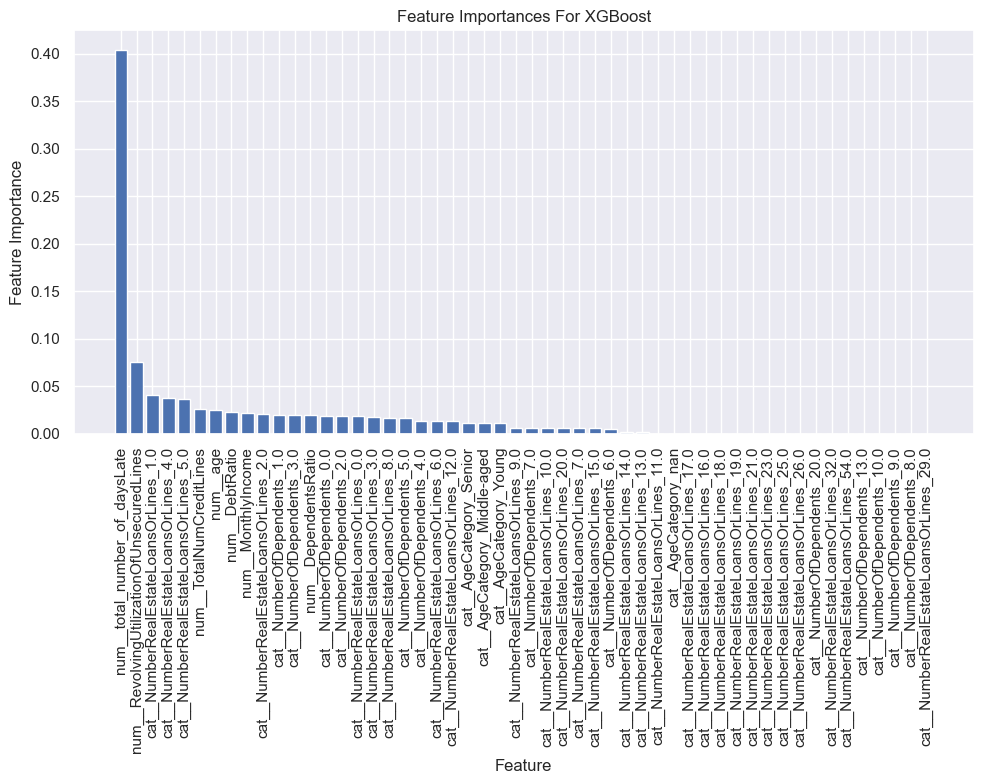

In [110]:
# Get feature importances from the trained model
feature_importances = xgbmodel.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances For XGBoost")
plt.tight_layout()
plt.show()


---

```py
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

param_grid = {
    'learning_rate': np.arange(0.1, 1 , 0.1).round(1).tolist(),  # Example values for the hyperparameter C 
    'gamma': np.arange(0.1, 1 , 0.1).round(1).tolist(),  # Example values for the gamma hyperparameter (for non-linear kernels)
#     'base_score': np.arange(0.1, 1 , 0.1).round(1).tolist(), 
#     'subsample' : np.arange(0.1, 1 , 0.1).round(1).tolist()
}

# Initialize the classifier
model = XGBClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Use the best estimator (model with best hyperparameters) to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

# Calculate and print the accuracy of the best model on the test data
print("Test accuracy of the best model:", test_accuracy)

accuracy = accuracy_score(Y_val, y_pred)
roc_auc = roc_auc_score(Y_val, y_pred)
print(f'The accuracy score of our model is: {accuracy * 100 : 2f}%', '\n')
print(f'The ROC-AUC score of our model is: {roc_auc * 100 : 2f}%', '\n')

from sklearn.metrics import classification_report

print(classification_report(Y_val, predictions))
```

### Random Forest Model

The accuracy score of our model on the Training set is:  99.951330%
The ROC-AUC score of our model on the Training set is:  99.951330%
The F1 score of our model on the Training set is:  99.951330% 


The accuracy score of our model on the Validation set is:  98.592606%
The ROC-AUC score of our model on the Validation set is:  98.592606%
The F1 score of our model on the Validation set is:  98.592606% 


Classification report on Validation set
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     27995
         1.0       0.97      1.00      0.99     27995

    accuracy                           0.99     55990
   macro avg       0.99      0.99      0.99     55990
weighted avg       0.99      0.99      0.99     55990



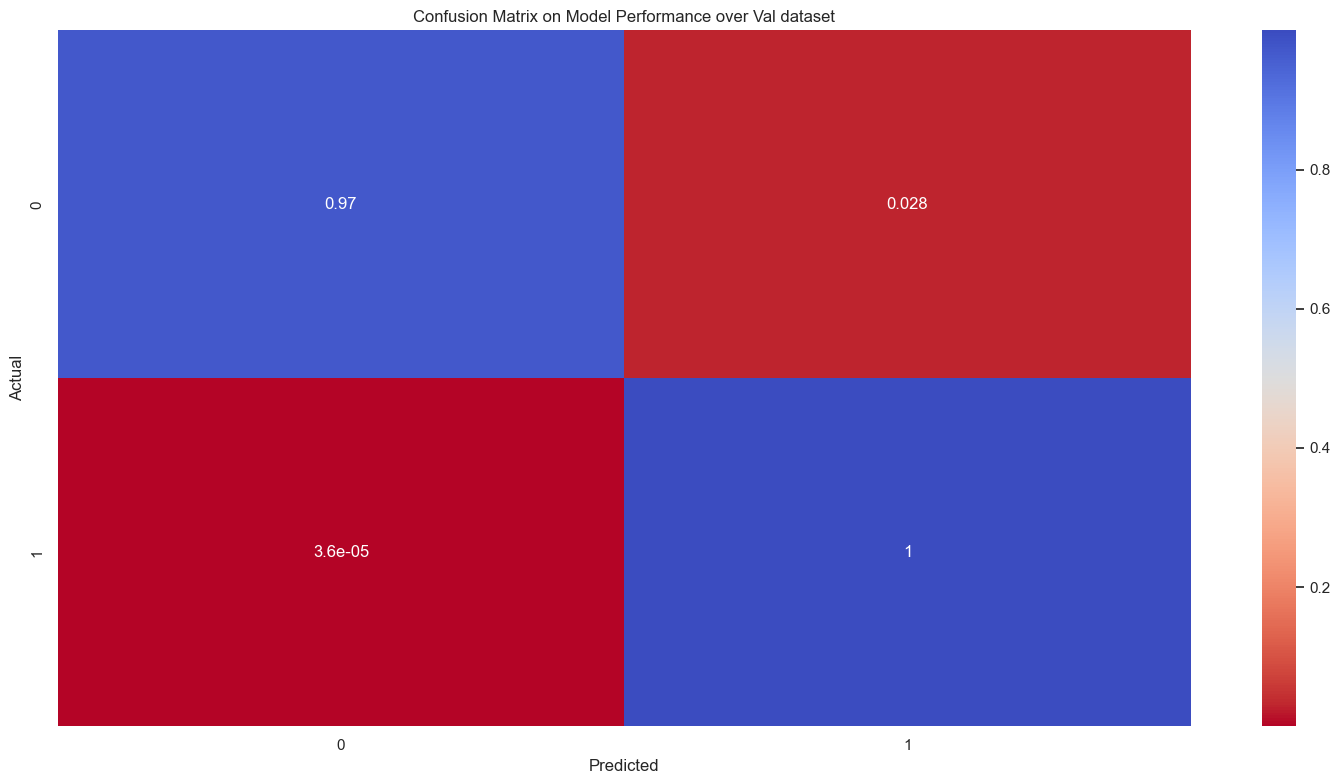

In [111]:
rf_classifier = RandomForestClassifier(n_jobs=-1, max_depth=200,n_estimators=1000, random_state=42)
predict_report(rf_classifier, 'Random Forest Algo.')

In [112]:
performance_df = pd.DataFrame(perf_dic).T
performance_df.columns = ['val_accuracy', 'val_roc-auc', 'val-f1']
performance_df

,val_accuracy,val_roc-auc,val-f1
LogisticRegression,74.96%,74.96%,74.96%
XGBoost,83.40%,83.40%,83.40%
Random Forest Algo.,98.59%,98.59%,98.59%


### <u> Summary: </u>

**`Question 1`: Which Algorithm performed better and why do you think so?**

- The Random Forest algorithm performed best based on the implimented metrics (val_accuracy, val_roc-auc, and val-f1), all of which are at 98.58%. This suggests that the Random Forest algorithm achieved higher accuracy, area under the ROC curve, and F1 score compared to Logistic Regression and XGBoost.

- The Random Forest algorithm is known for its ability to handle complex relationships in data, handle non-linearity, and reduce overfitting compared to individual decision trees. It combines the predictions of multiple decision trees, leading to improved generalization performance.

**`Question 2`What Can You Infer From Your Model Performance?**
- High Performance: The overall high values for accuracy, ROC-AUC, and F1 score across all algorithms indicate that the models are performing well on the validation set.

- Random Forest Strength: The Random Forest algorithm's consistently high performance across all metrics suggests that it is effective in capturing patterns and relationships in this particular data, making it a strong candidate for this particular task.


### <u> Prediction on the test data</u>

In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 150000 to 251502
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      0 non-null       Int64   
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64 
 2   age                                   101503 non-null  float64 
 3   DebtRatio                             101503 non-null  float64 
 4   MonthlyIncome                         101503 non-null  float64 
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  float64 
 6   NumberRealEstateLoansOrLines          101503 non-null  float64 
 7   NumberOfDependents                    101503 non-null  float64 
 8   total_number_of_daysLate              101503 non-null  float64 
 9   AgeCategory                           101500 non-null  category
 10  IncomeToDebtRatio                     101503 non-nu

In [114]:
test_data_pre = preprocessor.transform(test_df)

In [115]:
test_data = pd.DataFrame(test_data_pre, columns=preprocessor.get_feature_names_out())

In [116]:
### Removing the columns I removed earlier before training to prevent data leakage from high correlation
test_data.drop(columns=['num__IncomeToDebtRatio','num__NumberOfOpenCreditLinesAndLoans'], inplace=True)

In [117]:
test_predictions = rf_classifier.predict(test_data)

In [118]:
test_df['SeriousDlqin2yrs'] = test_predictions

In [119]:
### Exporting the test dataframe with the predictions
test_df.to_csv('final_predictions.csv', index=False)